In [1]:
import h2o
from h2o.automl import H2OAutoML
import random
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator


## 1.Regression

In [2]:
run_time = 333
name = 'abalone regression'

In [3]:
data_path = '/Users/matt/Desktop/abalone.csv'

In [4]:
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=6,port=port_no)

Checking whether there is an H2O instance running at http://localhost:49941..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_144"; Java(TM) SE Runtime Environment (build 1.8.0_144-b01); Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmp7fqz_cel
  JVM stdout: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmp7fqz_cel/h2o_matt_started_from_python.out
  JVM stderr: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmp7fqz_cel/h2o_matt_started_from_python.err
  Server is running at http://127.0.0.1:49941
Connecting to H2O server at http://127.0.0.1:49941... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_matt_pkfcp3
H2O cluster total nodes:,1
H2O cluster free memory:,5.750 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [5]:
print(data_path)

/Users/matt/Desktop/abalone.csv


In [6]:
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
df.head()

Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19


In [8]:
df.describe()

Rows:4177
Cols:9




,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
type,enum,real,real,real,real,real,real,real,int
mins,,0.075,0.055,0.0,0.002,0.001,0.0005,0.0015,1.0
mean,,0.5239920995930094,0.40788125448886764,0.13951639932966242,0.8287421594445776,0.35936748862820206,0.18059360785252573,0.23883085946851806,9.933684462532918
maxs,,0.815,0.65,1.13,2.8255,1.488,0.76,1.005,29.0
sigma,,0.12009291256479956,0.09923986613365944,0.04182705660725727,0.4903890182309976,0.2219629490332201,0.10961425025968448,0.1392026695223861,3.2241690320681275
zeros,,0,0,2,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15.0
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7.0
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9.0


In [9]:
target = None
# dependent variable
if target == None:
    target=df.columns[-1]
y = target

In [10]:
print(y)

Rings


In [11]:
X = df.columns
X.remove(y)

In [12]:
print(X)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [13]:
train, test = df.split_frame([0.9])

## 1.1GLM

In [15]:
glm_model = H2OGeneralizedLinearEstimator(family= "gaussian", nfolds = 5, lambda_ = 0, compute_p_values = True)
glm_model.train(x=X, y=y, training_frame= train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [16]:
glm_model.plot

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1539652131523_1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 4.727609412839928
RMSE: 2.1743066510591205
MAE: 1.5676362306509557
RMSLE: NaN
R^2: 0.5382748892718207
Mean Residual Deviance: 4.727609412839928
Null degrees of freedom: 3768
Residual degrees of freedom: 3759
Null deviance: 38590.84001061291
Residual deviance: 17818.359876993687
AIC: 16572.797381412263

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 4.8839296088993205
RMSE: 2.209961449640993
MAE: 1.5789585647858577
RMSLE: NaN
R^2: 0.5230077735835945
Mean Residual Deviance: 4.8839296088993205
Null degrees of freedom: 3768
Residual degrees of freedom: 3759
Null deviance: 38594.588444507935
Residual deviance: 18407.53069594154
AIC: 16695.404754345516
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.578133,0.0303044,1.6600491,1.5334682,1.5661643,1.5627037,1.5682793
mean_residual_deviance,4.872696,0.3330815,5.765526,4.896015,4.4248857,4.6662703,4.610783
mse,4.872696,0.3330815,5.765526,4.896015,4.4248857,4.6662703,4.610783
null_deviance,7718.9175,441.03506,8575.956,8148.385,7836.6846,6902.0986,7131.465
r2,0.5236005,0.0239304,0.4687661,0.5400013,0.5719854,0.5131378,0.5241121
residual_deviance,3681.506,325.63263,4554.765,3745.4514,3354.0632,3359.7144,3393.5361
rmse,2.204963,0.0736014,2.401151,2.2126942,2.1035411,2.160155,2.1472733
rmsle,0.1788261,0.0020560,NaN,0.1787922,0.1759356,NaN,0.1817506


Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-10-15 21:10:05,0.000 sec,0,38590.8400106,10.2390130


<bound method H2ORegressionModel.plot of >

In [17]:
pred = glm_model.predict(test)
pred.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,StdErr
10.4739,0.0880559
6.48864,0.078627
8.41301,0.0844624
10.1266,0.0938841
12.7386,0.107574
13.323,0.0944259
12.0331,0.0902499
11.3363,0.0696541
11.7532,0.066692
10.828,0.0815718


In [18]:
pref = glm_model.model_performance(test)
pref


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 5.51529836028047
RMSE: 2.3484672363651296
MAE: 1.6935956499765874
RMSLE: 0.18833150757282965
R^2: 0.5327228711931041
Mean Residual Deviance: 5.51529836028047
Null degrees of freedom: 407
Residual degrees of freedom: 398
Null deviance: 4820.239128593776
Residual deviance: 2250.2417309944317
AIC: 1876.5243495115792


For GLM_model the mse is 4.727609412839928 on train data and 5.51529836028047 on test data, the mse had incresed a little bit. So it's did a better job on the training data than the test data, probably is overfitting a litte bit.

## 1.2 GBM


In [20]:
gbm_model = H2OGradientBoostingEstimator(distribution= "gaussian",nfolds=5)
gbm_model.train(x=X, y=y, training_frame= train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [21]:
gbm_model.plot

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1539652131523_3


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3.317293085701543
RMSE: 1.8213437582459668
MAE: 1.3052167180806011
RMSLE: 0.14924445040700277
Mean Residual Deviance: 3.317293085701543

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4.6284232326211825
RMSE: 2.1513770549629796
MAE: 1.5108482776204106
RMSLE: 0.17373691684808915
Mean Residual Deviance: 4.6284232326211825
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.5097485,0.0679860,1.673924,1.4904824,1.5452557,1.393461,1.4456192
mean_residual_deviance,4.618915,0.369506,5.429313,4.317406,4.8715534,3.8748977,4.601405
mse,4.618915,0.369506,5.429313,4.317406,4.8715534,3.8748977,4.601405
r2,0.5480938,0.0107978,0.5354102,0.5558609,0.5248618,0.5600668,0.5642692
residual_deviance,4.618915,0.369506,5.429313,4.317406,4.8715534,3.8748977,4.601405
rmse,2.14573,0.0859014,2.3300886,2.077837,2.2071595,1.968476,2.1450887
rmsle,0.1734292,0.0058107,0.1862806,0.1671833,0.1793366,0.1639879,0.1703575


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2018-10-15 21:10:42,2.444 sec,0.0,3.1998458,2.3539816,10.2390130
,2018-10-15 21:10:42,2.466 sec,1.0,3.0326376,2.2251425,9.1968906
,2018-10-15 21:10:42,2.483 sec,2.0,2.8882489,2.1165810,8.3419815
,2018-10-15 21:10:42,2.491 sec,3.0,2.7645542,2.0222774,7.6427597
,2018-10-15 21:10:42,2.496 sec,4.0,2.6530099,1.9381647,7.0384617
---,---,---,---,---,---,---
,2018-10-15 21:10:42,2.870 sec,46.0,1.8325827,1.3128536,3.3583595
,2018-10-15 21:10:42,2.875 sec,47.0,1.8294650,1.3109959,3.3469424
,2018-10-15 21:10:42,2.880 sec,48.0,1.8281330,1.3100402,3.3420702
,2018-10-15 21:10:42,2.886 sec,49.0,1.8234853,1.3067006,3.3250986



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Shell weight,92881.8203125,1.0,0.6762984
Shucked weight,19635.3261719,0.2114012,0.1429703
Whole weight,5397.2573242,0.0581089,0.0392989
Diameter,5102.2797852,0.0549330,0.0371511
Height,4506.3139648,0.0485166,0.0328117
Sex,4062.6452637,0.0437399,0.0295812
Viscera weight,2964.0942383,0.0319125,0.0215824
Length,2788.7900391,0.0300251,0.0203060


<bound method H2ORegressionModel.plot of >

In [22]:
pred = gbm_model.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
10.2585
6.24573
8.47332
10.4736
11.7115
14.1459
11.5907
10.3413
11.0404
11.3308


In [23]:
pref = gbm_model.model_performance(test)
pref


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 5.45296092431811
RMSE: 2.3351575801898488
MAE: 1.5932470772560687
RMSLE: 0.1824363496380277
Mean Residual Deviance: 5.45296092431811


For the gbm_model, the mse is 3.317293085701543 on the training data and 5.45296092431811 on the testing data. The model is overfitting

## 1.3 random_forest

In [24]:
drf_model = H2OGradientBoostingEstimator(stopping_metric= "deviance",nfolds=5)
drf_model.train(x=X, y=y, training_frame= train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [25]:
drf_model.plot

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1539652131523_4


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3.317293085701543
RMSE: 1.8213437582459668
MAE: 1.3052167180806011
RMSLE: 0.14924445040700277
Mean Residual Deviance: 3.317293085701543

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4.581729646057437
RMSE: 2.1404975230206262
MAE: 1.5099966696330345
RMSLE: 0.17335220846480087
Mean Residual Deviance: 4.581729646057437
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.5104741,0.0258619,1.4802573,1.5667444,1.4629819,1.5133291,1.5290576
mean_residual_deviance,4.586427,0.1153695,4.538807,4.659639,4.292799,4.6796174,4.761274
mse,4.586427,0.1153695,4.538807,4.659639,4.292799,4.6796174,4.761274
r2,0.5509023,0.0138040,0.5556037,0.5501315,0.5699986,0.5143586,0.5644191
residual_deviance,4.586427,0.1153695,4.538807,4.659639,4.292799,4.6796174,4.761274
rmse,2.1412501,0.0271549,2.1304476,2.1586196,2.071907,2.1632423,2.1820345
rmsle,0.1733552,0.0022631,0.1693864,0.1778753,0.1734164,0.1757732,0.1703249


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2018-10-15 21:10:59,1.153 sec,0.0,3.1998458,2.3539816,10.2390130
,2018-10-15 21:10:59,1.165 sec,1.0,3.0326376,2.2251425,9.1968906
,2018-10-15 21:10:59,1.169 sec,2.0,2.8882489,2.1165810,8.3419815
,2018-10-15 21:10:59,1.175 sec,3.0,2.7645542,2.0222774,7.6427597
,2018-10-15 21:10:59,1.180 sec,4.0,2.6530099,1.9381647,7.0384617
---,---,---,---,---,---,---
,2018-10-15 21:10:59,1.380 sec,46.0,1.8325827,1.3128536,3.3583595
,2018-10-15 21:10:59,1.385 sec,47.0,1.8294650,1.3109959,3.3469424
,2018-10-15 21:10:59,1.390 sec,48.0,1.8281330,1.3100402,3.3420702
,2018-10-15 21:10:59,1.394 sec,49.0,1.8234853,1.3067006,3.3250986



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Shell weight,92881.8203125,1.0,0.6762984
Shucked weight,19635.3261719,0.2114012,0.1429703
Whole weight,5397.2573242,0.0581089,0.0392989
Diameter,5102.2797852,0.0549330,0.0371511
Height,4506.3139648,0.0485166,0.0328117
Sex,4062.6452637,0.0437399,0.0295812
Viscera weight,2964.0942383,0.0319125,0.0215824
Length,2788.7900391,0.0300251,0.0203060


<bound method H2ORegressionModel.plot of >

In [26]:
pred = drf_model.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
10.2585
6.24573
8.47332
10.4736
11.7115
14.1459
11.5907
10.3413
11.0404
11.3308


In [27]:
pref = drf_model.model_performance(test)
pref


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 5.45296092431811
RMSE: 2.3351575801898488
MAE: 1.5932470772560687
RMSLE: 0.1824363496380277
Mean Residual Deviance: 5.45296092431811


for the drf model, the mse is 3.317293085701543 on the training data and 5.45296092431811 on the testing data. The model is overfitting.

## 1.4 Deep learning

In [28]:
dp_model = H2ODeepLearningEstimator(
    model_id="MutlDL",
    hidden=[50,50],           
    epochs=50,                 
    ignore_const_cols=False, 
    sparse=True,              
    variable_importances=True,
    nfolds=5
)
dp_model.train(x=X,y = y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [29]:
dp_model.plot

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  MutlDL


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 5.865668546201815
RMSE: 2.4219142318013276
MAE: 1.9040087211367542
RMSLE: 0.20050844107466503
Mean Residual Deviance: 5.865668546201815

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 5.658338409571538
RMSE: 2.3787262157658113
MAE: 1.847566312080502
RMSLE: 0.19832713150960207
Mean Residual Deviance: 5.658338409571538
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.8469305,0.0919904,1.7205406,2.069493,1.8970344,1.828129,1.7194554
mean_residual_deviance,5.650562,0.4469230,5.4046245,6.7212224,5.9626756,5.23542,4.9288664
mse,5.650562,0.4469230,5.4046245,6.7212224,5.9626756,5.23542,4.9288664
r2,0.4485440,0.0200134,0.4753934,0.4130962,0.4286152,0.4380702,0.4875452
residual_deviance,5.650562,0.4469230,5.4046245,6.7212224,5.9626756,5.23542,4.9288664
rmse,2.373477,0.0926518,2.3247848,2.5925322,2.441859,2.288104,2.2201052
rmsle,0.1979703,0.0075302,0.1883843,0.2156129,0.2039089,0.1948892,0.1870561


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
,2018-10-15 21:11:33,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2018-10-15 21:11:33,12.739 sec,62617 obs/sec,5.1668878,1,19474.0,2.4831161,6.1658655,2.0596874,0.3978067
,2018-10-15 21:11:35,14.715 sec,94687 obs/sec,57.2042982,11,215603.0,2.4219142,5.8656685,1.9040087,0.4271256


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Shucked weight,1.0,1.0,0.1580821
Whole weight,0.7650543,0.7650543,0.1209414
Shell weight,0.6693134,0.6693134,0.1058065
Sex.M,0.6539977,0.6539977,0.1033853
Sex.F,0.6423760,0.6423760,0.1015482
Sex.I,0.6084121,0.6084121,0.0961791
Viscera weight,0.5294961,0.5294961,0.0837039
Diameter,0.5117155,0.5117155,0.0808931
Height,0.4871093,0.4871093,0.0770033
Length,0.4583517,0.4583517,0.0724572


<bound method H2ORegressionModel.plot of >

In [30]:
pred = dp_model.predict(test)
pred.head()

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict
11.8876
6.53234
8.10501
10.0541
14.9163
13.6421
12.4894
12.5495
14.3814
11.4631


In [31]:
pref = dp_model.model_performance(test)
pref


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 6.938634787517225
RMSE: 2.6341288479338334
MAE: 2.069074467404063
RMSLE: 0.2143417650625174
Mean Residual Deviance: 6.938634787517225


For the deep learning model the mse is 5.865668546201815 on the training model and 6.938634787517225 on the testing model. The model is a little bit overfitting.

## 1.5 Auto ML

In [32]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name=name)

In [33]:
aml.train(x=X,y=y,training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [34]:
aml_ld_df = aml.leaderboard.as_data_frame()

In [35]:
aml_ld_df

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,StackedEnsemble_AllModels_0_AutoML_20181015_21...,4.434801,2.105897,4.434801,1.502525,0.170777
1,StackedEnsemble_BestOfFamily_0_AutoML_20181015...,4.442140,2.107638,4.442140,1.508421,0.170951
2,GBM_grid_0_AutoML_20181015_211148_model_9,4.586179,2.141537,4.586179,1.516768,0.173465
3,GBM_grid_0_AutoML_20181015_211148_model_4,4.625781,2.150763,4.625781,1.532058,0.175533
4,GBM_grid_0_AutoML_20181015_211148_model_15,4.648548,2.156049,4.648548,1.523286,0.175621
5,GBM_grid_0_AutoML_20181015_211148_model_34,4.661976,2.159161,4.661976,1.536311,0.175357
6,GBM_grid_0_AutoML_20181015_211148_model_21,4.698083,2.167506,4.698083,1.544804,0.176705
7,GLM_grid_0_AutoML_20181015_211148_model_0,4.711984,2.170710,4.711984,1.574163,NaN
8,GBM_grid_0_AutoML_20181015_211148_model_1,4.714029,2.171182,4.714029,1.533723,0.175642
9,GBM_grid_0_AutoML_20181015_211148_model_7,4.735583,2.176139,4.735583,1.536004,0.175830


In [36]:
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_0_AutoML_20181015_211148,4.4348,2.1059,4.4348,1.50252,0.170777
StackedEnsemble_BestOfFamily_0_AutoML_20181015_211148,4.44214,2.10764,4.44214,1.50842,0.170951
GBM_grid_0_AutoML_20181015_211148_model_9,4.58618,2.14154,4.58618,1.51677,0.173465
GBM_grid_0_AutoML_20181015_211148_model_4,4.62578,2.15076,4.62578,1.53206,0.175533
GBM_grid_0_AutoML_20181015_211148_model_15,4.64855,2.15605,4.64855,1.52329,0.175621
GBM_grid_0_AutoML_20181015_211148_model_34,4.66198,2.15916,4.66198,1.53631,0.175357
GBM_grid_0_AutoML_20181015_211148_model_21,4.69808,2.16751,4.69808,1.5448,0.176705
GLM_grid_0_AutoML_20181015_211148_model_0,4.71198,2.17071,4.71198,1.57416,nan
GBM_grid_0_AutoML_20181015_211148_model_1,4.71403,2.17118,4.71403,1.53372,0.175642
GBM_grid_0_AutoML_20181015_211148_model_7,4.73558,2.17614,4.73558,1.536,0.17583


In [37]:
lb[:5,"model_id"]

model_id
StackedEnsemble_AllModels_0_AutoML_20181015_211148
StackedEnsemble_BestOfFamily_0_AutoML_20181015_211148
GBM_grid_0_AutoML_20181015_211148_model_9
GBM_grid_0_AutoML_20181015_211148_model_4
GBM_grid_0_AutoML_20181015_211148_model_15


In [38]:
m = h2o.get_model(lb[2,"model_id"])
m

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20181015_211148_model_9


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3.160883496030043
RMSE: 1.7778873687694738
MAE: 1.255954652447602
RMSLE: 0.14364723138384602
Mean Residual Deviance: 3.160883496030043

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 4.336805954527118
RMSE: 2.0824999290581303
MAE: 1.4667477148576828
RMSLE: 0.16826219529663133
Mean Residual Deviance: 4.336805954527118

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4.586179385790485
RMSE: 2.141536687939407
MAE: 1.516767907604962
RMSLE: 0.17346450096271426
Mean Residual Deviance: 4.586179385790485
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.5167367,0.0356906,1.5334464,1.594954,1.4667878,1.4566004,1.5318953
mean_residual_deviance,4.585931,0.2898193,4.765925,5.1630797,4.0254464,4.2221084,4.7530947
mse,4.585931,0.2898193,4.765925,5.1630797,4.0254464,4.2221084,4.7530947
r2,0.5527904,0.0188658,0.5070531,0.5557122,0.5683597,0.5869703,0.5458567
residual_deviance,4.585931,0.2898193,4.765925,5.1630797,4.0254464,4.2221084,4.7530947
rmse,2.1393259,0.0678828,2.1830997,2.272241,2.0063515,2.054777,2.1801593
rmsle,0.1733983,0.0033293,0.1786909,0.1751794,0.1718688,0.1650608,0.1761914


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-10-15 21:12:14,6.735 sec,0.0,3.2054750,2.3572785,10.2750703,3.1759926,2.3400061,10.0869292
,2018-10-15 21:12:14,6.753 sec,5.0,2.8526917,2.0896556,8.1378502,2.8498326,2.0844215,8.1215461
,2018-10-15 21:12:14,6.769 sec,10.0,2.5689369,1.8696084,6.5994368,2.5947677,1.8752773,6.7328194
,2018-10-15 21:12:14,6.784 sec,15.0,2.3652093,1.7089309,5.5942150,2.4247055,1.7379828,5.8791966
,2018-10-15 21:12:14,6.799 sec,20.0,2.2238209,1.5965949,4.9453794,2.3124391,1.6440709,5.3473745
,2018-10-15 21:12:14,6.814 sec,25.0,2.1140102,1.5084913,4.4690392,2.2382353,1.5813025,5.0096975
,2018-10-15 21:12:14,6.831 sec,30.0,2.0335399,1.4424717,4.1352847,2.1829816,1.5381064,4.7654086
,2018-10-15 21:12:14,6.846 sec,35.0,1.9730091,1.3942054,3.8927648,2.1472773,1.5070584,4.6107997
,2018-10-15 21:12:14,6.861 sec,40.0,1.9282414,1.3589031,3.7181148,2.1262752,1.4918552,4.5210462
,2018-10-15 21:12:14,6.876 sec,45.0,1.8886004,1.3294942,3.5668115,2.1068846,1.4770541,4.4389628


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Shell weight,100631.7109375,1.0,0.4671920
Shucked weight,26057.9941406,0.2589442,0.1209767
Height,20855.4882812,0.2072457,0.0968235
Viscera weight,19895.9082031,0.1977101,0.0923686
Diameter,16692.7265625,0.1658794,0.0774975
Whole weight,16361.2871094,0.1625858,0.0759588
Length,9868.0888672,0.0980614,0.0458135
Sex,5033.6855469,0.0500209,0.0233694


In [39]:
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Shell weight,100631.710938,1.000000,0.467192
1,Shucked weight,26057.994141,0.258944,0.120977
2,Height,20855.488281,0.207246,0.096824
3,Viscera weight,19895.908203,0.197710,0.092369
4,Diameter,16692.726562,0.165879,0.077498
5,Whole weight,16361.287109,0.162586,0.075959
6,Length,9868.088867,0.098061,0.045814
7,Sex,5033.685547,0.050021,0.023369


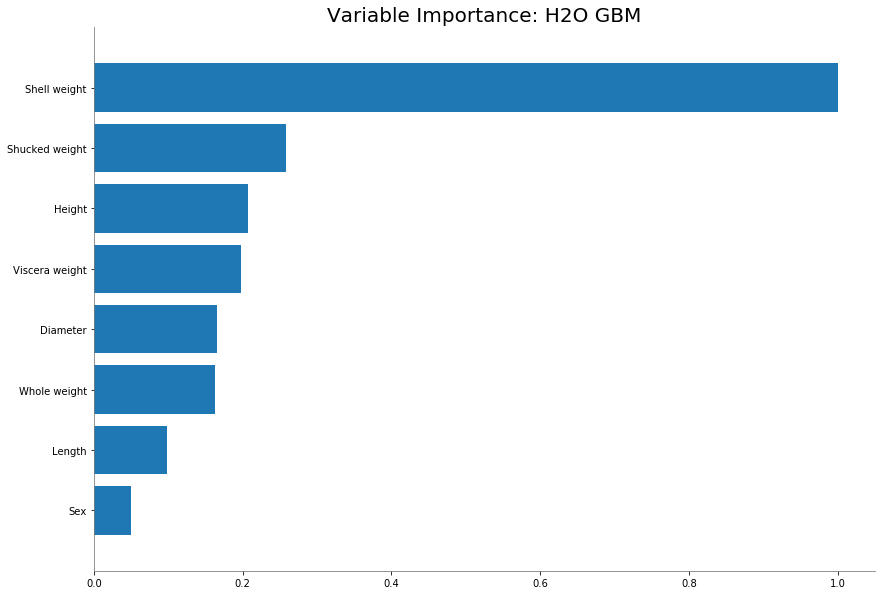

In [40]:
m.varimp_plot()

In [41]:
aml.leader.model_performance()


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2.6793218985414757
RMSE: 1.6368634330760388
MAE: 1.1870386409938505
RMSLE: 0.13359362179609738
R^2: 0.7392405283210717
Mean Residual Deviance: 2.6793218985414757
Null degrees of freedom: 3046
Residual degrees of freedom: 3034
Null deviance: 31308.139153265463
Residual deviance: 8163.893824855877
AIC: 11678.024135833622


In [42]:
aml.leader.plot

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_0_AutoML_20181015_211148
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2.6793218985414757
RMSE: 1.6368634330760388
MAE: 1.1870386409938505
RMSLE: 0.13359362179609738
R^2: 0.7392405283210717
Mean Residual Deviance: 2.6793218985414757
Null degrees of freedom: 3046
Residual degrees of freedom: 3034
Null deviance: 31308.139153265463
Residual deviance: 8163.893824855877
AIC: 11678.024135833622

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 4.397915659472469
RMSE: 2.0971208023078853
MAE: 1.4758325019046536
RMSLE: 0.17187704454642422
R^2: 0.5639791722560221
Mean Residual Deviance: 4.397915659472469
Null degrees of freedom: 721
Residual degrees of freedom: 709
Null deviance: 7282.762891809092
Residual deviance: 3175.2951061391227
AIC: 3146.323618127116

ModelMetricsRegressionGLM: stackedensem

<bound method H2ORegressionModel.plot of >

In [43]:
pred = aml.predict(test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
10.4622
6.01253
8.24998
10.3883
12.3177
13.8234
12.4781
11.198
11.5442
11.563


In [44]:
pref = aml.leader.model_performance(test)
pref


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 5.128572178560316
RMSE: 2.2646351093631654
MAE: 1.5993990447405644
RMSLE: 0.1786690210678624
R^2: 0.5654877894303576
Mean Residual Deviance: 5.128572178560316
Null degrees of freedom: 407
Residual degrees of freedom: 395
Null deviance: 4820.597054633303
Residual deviance: 2092.457448852609
AIC: 1852.8633785069421


For model StackedEnsemble_AllModels_0_AutoML_20181015_21 the mse is 2.6793218985414757 on the training data and 5.128572178560316 on the testing data. The model is overfitting.

## 2 Binary Classification

In [45]:
data_path2 = 'Downloads/pokemon_alopez247.csv'

In [46]:
run_time = 333
name2 = 'pokemon binary classification'

In [47]:
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=6,port=port_no)

Checking whether there is an H2O instance running at http://localhost:27968..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_144"; Java(TM) SE Runtime Environment (build 1.8.0_144-b01); Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmpl3hdapwt
  JVM stdout: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmpl3hdapwt/h2o_matt_started_from_python.out
  JVM stderr: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmpl3hdapwt/h2o_matt_started_from_python.err
  Server is running at http://127.0.0.1:27968
Connecting to H2O server at http://127.0.0.1:27968... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_matt_x5dtpx
H2O cluster total nodes:,1
H2O cluster free memory:,5.750 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [48]:
print(data_path2)

Downloads/pokemon_alopez247.csv


In [49]:
df2 = h2o.import_file(data_path2)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [50]:
df2.head()

Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100,45,quadruped
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19,45,bipedal_tailed
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Red,True,0.875,Monster,Dragon,True,1.7,90.5,45,bipedal_tailed
7,Squirtle,Water,,314,44,48,65,50,64,43,1,False,Blue,True,0.875,Monster,Water_1,False,0.51,9,45,bipedal_tailed
8,Wartortle,Water,,405,59,63,80,65,80,58,1,False,Blue,True,0.875,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed
9,Blastoise,Water,,530,79,83,100,85,105,78,1,False,Blue,True,0.875,Monster,Water_1,True,1.6,85.5,45,bipedal_tailed
10,Caterpie,Bug,,195,45,30,35,20,20,45,1,False,Green,True,0.5,Bug,,False,0.3,2.9,255,insectoid


In [51]:
df2.describe()

Rows:721
Cols:23




,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
type,int,string,enum,enum,int,int,int,int,int,int,int,int,enum,enum,enum,real,enum,enum,enum,real,real,int,enum
mins,1.0,NaN,,,180.0,1.0,5.0,5.0,10.0,20.0,5.0,1.0,,,,0.0,,,,0.1,0.1,3.0,
mean,361.0,NaN,,,417.94590846047157,68.38002773925103,75.01386962552009,70.80859916782246,68.7378640776699,69.29126213592232,65.71428571428571,3.323162274618585,,,,0.5533773291925466,,,,1.14497919556172,56.773370319001394,100.24687933425797,
maxs,721.0,NaN,,,720.0,255.0,165.0,230.0,154.0,230.0,160.0,6.0,,,,1.0,,,,14.5,950.0,255.0,
sigma,208.2790595971344,NaN,,,109.66367074447545,25.84827182057517,28.98447528188689,29.296558071563616,28.7880052257176,27.01586043808999,27.27792002031901,1.6698732445299678,,,,0.19996900735371828,,,,1.0443685124726578,89.09566681624158,76.57351274971818,
zeros,0,0,,,0,0,0,0,0,0,0,0,,,,23,,,,0,0,0,
missing,0,0,0,371,0,0,0,0,0,0,0,0,0,0,0,77,0,530,0,0,0,0,0
0,1.0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45.0,quadruped
1,2.0,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45.0,quadruped
2,3.0,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45.0,quadruped


In [52]:
df2 = df2.drop(['Number','Type_2','Egg_Group_2'])

In [53]:
df2.describe()

Rows:721
Cols:20




,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
type,string,enum,int,int,int,int,int,int,int,int,enum,enum,enum,real,enum,enum,real,real,int,enum
mins,NaN,,180.0,1.0,5.0,5.0,10.0,20.0,5.0,1.0,,,,0.0,,,0.1,0.1,3.0,
mean,NaN,,417.94590846047157,68.38002773925103,75.01386962552009,70.80859916782246,68.7378640776699,69.29126213592232,65.71428571428571,3.323162274618585,,,,0.5533773291925466,,,1.14497919556172,56.773370319001394,100.24687933425797,
maxs,NaN,,720.0,255.0,165.0,230.0,154.0,230.0,160.0,6.0,,,,1.0,,,14.5,950.0,255.0,
sigma,NaN,,109.66367074447545,25.84827182057517,28.98447528188689,29.296558071563616,28.7880052257176,27.01586043808999,27.27792002031901,1.6698732445299678,,,,0.19996900735371828,,,1.0443685124726578,89.09566681624158,76.57351274971818,
zeros,0,,0,0,0,0,0,0,0,0,,,,23,,,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,77,0,0,0,0,0,0
0,Bulbasaur,Grass,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,Green,True,0.875,Monster,False,0.71,6.9,45.0,quadruped
1,Ivysaur,Grass,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,Green,True,0.875,Monster,False,0.99,13.0,45.0,quadruped
2,Venusaur,Grass,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,Green,True,0.875,Monster,True,2.01,100.0,45.0,quadruped


In [54]:
df2.impute('Pr_Male',method = 'mean')

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.5533773291925466,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [55]:
df2.describe()

Rows:721
Cols:20




,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
type,string,enum,int,int,int,int,int,int,int,int,enum,enum,enum,real,enum,enum,real,real,int,enum
mins,NaN,,180.0,1.0,5.0,5.0,10.0,20.0,5.0,1.0,,,,0.0,,,0.1,0.1,3.0,
mean,NaN,,417.94590846047157,68.38002773925103,75.01386962552009,70.80859916782246,68.7378640776699,69.29126213592232,65.71428571428571,3.323162274618585,,,,0.5533773291925467,,,1.14497919556172,56.773370319001394,100.24687933425797,
maxs,NaN,,720.0,255.0,165.0,230.0,154.0,230.0,160.0,6.0,,,,1.0,,,14.5,950.0,255.0,
sigma,NaN,,109.66367074447545,25.84827182057517,28.98447528188689,29.296558071563616,28.7880052257176,27.01586043808999,27.27792002031901,1.6698732445299678,,,,0.18897394481267568,,,1.0443685124726578,89.09566681624158,76.57351274971818,
zeros,0,,0,0,0,0,0,0,0,0,,,,23,,,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Bulbasaur,Grass,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,Green,True,0.875,Monster,False,0.71,6.9,45.0,quadruped
1,Ivysaur,Grass,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,Green,True,0.875,Monster,False,0.99,13.0,45.0,quadruped
2,Venusaur,Grass,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,Green,True,0.875,Monster,True,2.01,100.0,45.0,quadruped


In [56]:
y='isLegendary'
X=df2.columns
X.remove(y)
X.remove('Name')

In [57]:
print(X)

['Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style']


In [58]:
train, test = df2.split_frame([0.9])

## 2.1 GLM

In [59]:
glm_model2 = H2OGeneralizedLinearEstimator(family= "binomial",nfolds=5)
glm_model2.train(x=X, y=y, training_frame= train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [60]:
glm_model2.plot

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1539652770571_1


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.01628834921238369
RMSE: 0.12762581718595847
LogLoss: 0.06505582896315794
Null degrees of freedom: 650
Residual degrees of freedom: 639
Null deviance: 306.0867169416284
Residual deviance: 84.70268931003163
AIC: 108.70268931003163
AUC: 0.9973610555777689
Gini: 0.9947221111555378
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3345862989359517: 


,False,True,Error,Rate
False,605.0,5.0,0.0082,(5.0/610.0)
True,0.0,41.0,0.0,(0.0/41.0)
Total,605.0,46.0,0.0077,(5.0/651.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3345863,0.9425287,45.0
max f2,0.3345863,0.9761905,45.0
max f0point5,0.3345863,0.9111111,45.0
max accuracy,0.3345863,0.9923195,45.0
max precision,0.9364321,1.0,0.0
max recall,0.3345863,1.0,45.0
max specificity,0.9364321,1.0,0.0
max absolute_mcc,0.3345863,0.9402120,45.0
max min_per_class_accuracy,0.3345863,0.9918033,45.0
max mean_per_class_accuracy,0.3345863,0.9959016,45.0


Gains/Lift Table: Avg response rate:  6.30 %, avg score:  6.30 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107527,0.8067554,15.8780488,15.8780488,1.0,0.8730709,1.0,0.8730709,0.1707317,0.1707317,1487.8048780,1487.8048780
,2,0.0215054,0.6253772,15.8780488,15.8780488,1.0,0.7503178,1.0,0.8116944,0.1707317,0.3414634,1487.8048780,1487.8048780
,3,0.0307220,0.5519000,15.8780488,15.8780488,1.0,0.5845586,1.0,0.7435536,0.1463415,0.4878049,1487.8048780,1487.8048780
,4,0.0414747,0.4906044,11.3414634,14.7018970,0.7142857,0.5225900,0.9259259,0.6862668,0.1219512,0.6097561,1034.1463415,1370.1897019
,5,0.0506912,0.4381112,13.2317073,14.4345898,0.8333333,0.4625297,0.9090909,0.6455873,0.1219512,0.7317073,1223.1707317,1343.4589800
,6,0.1013825,0.0999496,5.2926829,9.8636364,0.3333333,0.2488677,0.6212121,0.4472275,0.2682927,1.0,429.2682927,886.3636364
,7,0.1505376,0.0682224,0.0,6.6428571,0.0,0.0822811,0.4183673,0.3280613,0.0,1.0,-100.0,564.2857143
,8,0.2012289,0.0515971,0.0,4.9694656,0.0,0.0594103,0.3129771,0.2603859,0.0,1.0,-100.0,396.9465649
,9,0.3010753,0.0332791,0.0,3.3214286,0.0,0.0409916,0.2091837,0.1876276,0.0,1.0,-100.0,232.1428571
,10,0.4009217,0.0217644,0.0,2.4942529,0.0,0.0272852,0.1570881,0.1476956,0.0,1.0,-100.0,149.4252874




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.020899871502994806
RMSE: 0.14456787853114123
LogLoss: 0.0784703282864102
Null degrees of freedom: 650
Residual degrees of freedom: 640
Null deviance: 306.88174241204695
Residual deviance: 102.16836742890607
AIC: 124.16836742890607
AUC: 0.9960015993602558
Gini: 0.9920031987205116
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2372595613447828: 


,False,True,Error,Rate
False,603.0,7.0,0.0115,(7.0/610.0)
True,0.0,41.0,0.0,(0.0/41.0)
Total,603.0,48.0,0.0108,(7.0/651.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2372596,0.9213483,46.0
max f2,0.2372596,0.9669811,46.0
max f0point5,0.3276944,0.8883249,37.0
max accuracy,0.2372596,0.9892473,46.0
max precision,0.9421406,1.0,0.0
max recall,0.2372596,1.0,46.0
max specificity,0.9421406,1.0,0.0
max absolute_mcc,0.2372596,0.9188932,46.0
max min_per_class_accuracy,0.2372596,0.9885246,46.0
max mean_per_class_accuracy,0.2372596,0.9942623,46.0


Gains/Lift Table: Avg response rate:  6.30 %, avg score:  6.24 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107527,0.7503071,15.8780488,15.8780488,1.0,0.8500308,1.0,0.8500308,0.1707317,0.1707317,1487.8048780,1487.8048780
,2,0.0215054,0.5842161,15.8780488,15.8780488,1.0,0.6749063,1.0,0.7624686,0.1707317,0.3414634,1487.8048780,1487.8048780
,3,0.0307220,0.4951418,7.9390244,13.4963415,0.5,0.5281755,0.85,0.6921806,0.0731707,0.4146341,693.9024390,1249.6341463
,4,0.0414747,0.4375437,15.8780488,14.1138211,1.0,0.4606050,0.8888889,0.6321425,0.1707317,0.5853659,1487.8048780,1311.3821138
,5,0.0506912,0.3693618,13.2317073,13.9534368,0.8333333,0.3884497,0.8787879,0.5878347,0.1219512,0.7073171,1223.1707317,1295.3436807
,6,0.1013825,0.1155496,5.7738359,9.8636364,0.3636364,0.2258789,0.6212121,0.4068568,0.2926829,1.0,477.3835920,886.3636364
,7,0.1505376,0.0832578,0.0,6.6428571,0.0,0.0944903,0.4183673,0.3048596,0.0,1.0,-100.0,564.2857143
,8,0.2012289,0.0606251,0.0,4.9694656,0.0,0.0679849,0.3129771,0.2451889,0.0,1.0,-100.0,396.9465649
,9,0.3010753,0.0400490,0.0,3.3214286,0.0,0.0494631,0.2091837,0.1802798,0.0,1.0,-100.0,232.1428571
,10,0.4009217,0.0259279,0.0,2.4942529,0.0,0.0325715,0.1570881,0.1434942,0.0,1.0,-100.0,149.4252874



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9925371,0.0033375,0.9925373,1.0,0.9924812,0.9850746,0.9925926
auc,0.9966966,0.0018632,0.9991935,1.0,0.994,0.9934896,0.9968
err,0.0074629,0.0033375,0.0074627,0.0,0.0075188,0.0149254,0.0074074
err_count,1.0,0.4472136,1.0,0.0,1.0,2.0,1.0
f0point5,0.9340067,0.0239318,0.9259259,1.0,0.9090909,0.9090909,0.9259259
---,---,---,---,---,---,---,---
r2,0.6469798,0.0435369,0.7307851,0.6708993,0.5813249,0.6814589,0.5704308
recall,0.9333333,0.0942809,1.0,1.0,1.0,0.6666667,1.0
residual_deviance,20.433674,2.6691458,19.382088,17.20089,23.89019,15.979514,25.715683
rmse,0.1431455,0.0130652,0.1363502,0.1371600,0.1538462,0.1167236,0.1716476



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-10-15 21:20:07,0.000 sec,0,153.0433585,0.2350896
,2018-10-15 21:20:07,0.004 sec,1,68.6535190,0.1988892
,2018-10-15 21:20:07,0.007 sec,2,76.3921692,0.1431330
,2018-10-15 21:20:07,0.010 sec,3,44.3182382,0.1218385
,2018-10-15 21:20:07,0.012 sec,4,42.7589471,0.1209043
,2018-10-15 21:20:07,0.021 sec,5,42.3605389,0.1208884
,2018-10-15 21:20:07,0.024 sec,6,42.3513447,0.1208884


<bound method H2OBinomialModel.plot of >

In [61]:
pred = glm_model2.predict(test)
pred.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,False,True
False,0.996043,0.00395656
False,0.996697,0.00330334
False,0.999549,0.000450917
False,0.985581,0.0144192
False,0.998985,0.00101523
False,0.96252,0.03748
False,0.964097,0.0359034
False,0.991997,0.00800344
False,0.99182,0.00817999
False,0.993298,0.00670187


In [62]:
pref = glm_model2.model_performance(test)
pref


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.014643906806201252
RMSE: 0.12101201099974024
LogLoss: 0.0585420587431145
Null degrees of freedom: 69
Residual degrees of freedom: 58
Null deviance: 36.10596481040022
Residual deviance: 8.19588822403603
AIC: 32.19588822403603
AUC: 0.9938461538461537
Gini: 0.9876923076923074
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4279951312198837: 


,False,True,Error,Rate
False,64.0,1.0,0.0154,(1.0/65.0)
True,0.0,5.0,0.0,(0.0/5.0)
Total,64.0,6.0,0.0143,(1.0/70.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4279951,0.9090909,5.0
max f2,0.4279951,0.9615385,5.0
max f0point5,0.7694152,0.8823529,2.0
max accuracy,0.4279951,0.9857143,5.0
max precision,0.9347357,1.0,0.0
max recall,0.4279951,1.0,5.0
max specificity,0.9347357,1.0,0.0
max absolute_mcc,0.4279951,0.9058216,5.0
max min_per_class_accuracy,0.4279951,0.9846154,5.0
max mean_per_class_accuracy,0.4279951,0.9923077,5.0


Gains/Lift Table: Avg response rate:  7.14 %, avg score:  7.37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0142857,0.8913981,14.0,14.0,1.0,0.9347357,1.0,0.9347357,0.2,0.2,1300.0,1300.0
,2,0.0285714,0.8329729,14.0,14.0,1.0,0.8719276,1.0,0.9033316,0.2,0.4,1300.0,1300.0
,3,0.0428571,0.7497175,14.0,14.0,1.0,0.7694152,1.0,0.8586928,0.2,0.6,1300.0,1300.0
,4,0.0428571,0.5555542,0.0,14.0,0.0,0.0,1.0,0.8586928,0.0,0.6,-100.0,1300.0
,5,0.0571429,0.4618060,0.0,10.5,0.0,0.4880192,0.75,0.7660244,0.0,0.6,-100.0,950.0
,6,0.1,0.0884872,9.3333333,10.0,0.6666667,0.3157700,0.7142857,0.5730582,0.4,1.0,833.3333333,900.0
,7,0.1571429,0.0606575,0.0,6.3636364,0.0,0.0769329,0.4545455,0.3926490,0.0,1.0,-100.0,536.3636364
,8,0.2,0.0529270,0.0,5.0,0.0,0.0571111,0.3571429,0.3207480,0.0,1.0,-100.0,400.0
,9,0.3,0.0327719,0.0,3.3333333,0.0,0.0418028,0.2380952,0.2277663,0.0,1.0,-100.0,233.3333333
,10,0.4,0.0185211,0.0,2.5,0.0,0.0244386,0.1785714,0.1769344,0.0,1.0,-100.0,150.0


For GLM_model2 the AUC is 0.9973610555777689 on the training data and 0.9938461538461537 on the testing data. The model is a good fit.

## 2.2 GBM

In [63]:
gbm_model2 = H2OGradientBoostingEstimator(distribution= "bernoulli",nfolds=5)
gbm_model2.train(x=X, y=y, training_frame= train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [64]:
gbm_model2.plot

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1539652770571_21


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 7.631397724256878e-05
RMSE: 0.00873578715643695
LogLoss: 0.0022693383695799995
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9138771439004214: 


,False,True,Error,Rate
False,610.0,0.0,0.0,(0.0/610.0)
True,0.0,41.0,0.0,(0.0/41.0)
Total,610.0,41.0,0.0,(0.0/651.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9138771,1.0,39.0
max f2,0.9138771,1.0,39.0
max f0point5,0.9138771,1.0,39.0
max accuracy,0.9138771,1.0,39.0
max precision,0.9954093,1.0,0.0
max recall,0.9138771,1.0,39.0
max specificity,0.9954093,1.0,0.0
max absolute_mcc,0.9138771,1.0,39.0
max min_per_class_accuracy,0.9138771,1.0,39.0
max mean_per_class_accuracy,0.9138771,1.0,39.0


Gains/Lift Table: Avg response rate:  6.30 %, avg score:  6.31 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107527,0.9927550,15.8780488,15.8780488,1.0,0.9937920,1.0,0.9937920,0.1707317,0.1707317,1487.8048780,1487.8048780
,2,0.0215054,0.9917092,15.8780488,15.8780488,1.0,0.9922856,1.0,0.9930388,0.1707317,0.3414634,1487.8048780,1487.8048780
,3,0.0307220,0.9889615,15.8780488,15.8780488,1.0,0.9904214,1.0,0.9922536,0.1463415,0.4878049,1487.8048780,1487.8048780
,4,0.0414747,0.9855733,15.8780488,15.8780488,1.0,0.9869721,1.0,0.9908843,0.1707317,0.6585366,1487.8048780,1487.8048780
,5,0.0506912,0.9772583,15.8780488,15.8780488,1.0,0.9821252,1.0,0.9892917,0.1463415,0.8048780,1487.8048780,1487.8048780
,6,0.1029186,0.0023809,3.7360115,9.7164179,0.2352941,0.2388906,0.6119403,0.6084912,0.1951220,1.0,273.6011478,871.6417910
,7,0.1505376,0.0006235,0.0,6.6428571,0.0,0.0013865,0.4183673,0.4164479,0.0,1.0,-100.0,564.2857143
,8,0.2043011,0.0004228,0.0,4.8947368,0.0,0.0004617,0.3082707,0.3069778,0.0,1.0,-100.0,389.4736842
,9,0.8709677,0.0004228,0.0,1.1481481,0.0,0.0004228,0.0723104,0.0723308,0.0,1.0,-100.0,14.8148148
,10,0.9016897,0.0004225,0.0,1.1090290,0.0,0.0004226,0.0698467,0.0698807,0.0,1.0,-100.0,10.9028961




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.008531012610950937
RMSE: 0.09236348093781944
LogLoss: 0.03357896117304334
Mean Per-Class Error: 0.007377049180327888
AUC: 0.9970811675329868
Gini: 0.9941623350659736
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5593531066779743: 


,False,True,Error,Rate
False,606.0,4.0,0.0066,(4.0/610.0)
True,1.0,40.0,0.0244,(1.0/41.0)
Total,607.0,44.0,0.0077,(5.0/651.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5593531,0.9411765,43.0
max f2,0.5593531,0.9615385,43.0
max f0point5,0.5593531,0.9216590,43.0
max accuracy,0.5593531,0.9923195,43.0
max precision,0.9978283,1.0,0.0
max recall,0.0402810,1.0,49.0
max specificity,0.9978283,1.0,0.0
max absolute_mcc,0.5593531,0.9377421,43.0
max min_per_class_accuracy,0.0402810,0.9852459,49.0
max mean_per_class_accuracy,0.0402810,0.9926230,49.0


Gains/Lift Table: Avg response rate:  6.30 %, avg score:  6.50 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107527,0.9952750,15.8780488,15.8780488,1.0,0.9962044,1.0,0.9962044,0.1707317,0.1707317,1487.8048780,1487.8048780
,2,0.0215054,0.9920987,15.8780488,15.8780488,1.0,0.9932862,1.0,0.9947453,0.1707317,0.3414634,1487.8048780,1487.8048780
,3,0.0307220,0.9846755,10.5853659,14.2902439,0.6666667,0.9874636,0.9,0.9925608,0.0975610,0.4390244,958.5365854,1329.0243902
,4,0.0414747,0.9664002,15.8780488,14.7018970,1.0,0.9744334,0.9259259,0.9878611,0.1707317,0.6097561,1487.8048780,1370.1897019
,5,0.0506912,0.9282106,13.2317073,14.4345898,0.8333333,0.9471598,0.9090909,0.9804609,0.1219512,0.7317073,1223.1707317,1343.4589800
,6,0.1013825,0.0034700,5.2926829,9.8636364,0.3333333,0.2938698,0.6212121,0.6371653,0.2682927,1.0,429.2682927,886.3636364
,7,0.1505376,0.0007830,0.0,6.6428571,0.0,0.0015254,0.4183673,0.4296094,0.0,1.0,-100.0,564.2857143
,8,0.2012289,0.0004955,0.0,4.9694656,0.0,0.0006121,0.3129771,0.3215414,0.0,1.0,-100.0,396.9465649
,9,0.3149002,0.0004739,0.0,3.1756098,0.0,0.0004744,0.2,0.2056440,0.0,1.0,-100.0,217.5609756
,10,0.5069124,0.0004372,0.0,1.9727273,0.0,0.0004461,0.1242424,0.1279175,0.0,1.0,-100.0,97.2727273



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9923078,0.0035333,1.0,0.984252,0.9931034,0.9919355,0.9922481
auc,0.9972352,0.0020140,1.0,0.9918699,0.9990876,0.9980676,0.997151
err,0.0076922,0.0035333,0.0,0.0157480,0.0068966,0.0080645,0.0077519
err_count,1.0,0.4472136,0.0,2.0,1.0,1.0,1.0
f0point5,0.9072973,0.0717142,1.0,0.7142857,0.9090909,0.9756098,0.9375
f1,0.9284706,0.0478938,1.0,0.8,0.9411765,0.9411765,0.96
f2,0.9554796,0.0273537,1.0,0.9090909,0.9756098,0.9090909,0.9836066
lift_top_group,18.030556,5.143205,15.75,31.75,18.125,13.777778,10.75
logloss,0.0337966,0.0155553,0.0030273,0.0702021,0.0233379,0.0325638,0.0398518
max_per_class_error,0.0286435,0.0293839,0.0,0.0162602,0.0072993,0.1111111,0.0085470


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-10-15 21:20:42,5.066 sec,0.0,0.2429270,0.2350896,0.5,1.0,0.9370200
,2018-10-15 21:20:42,5.096 sec,1.0,0.2073077,0.1583142,0.9970812,15.8780488,0.0153610
,2018-10-15 21:20:42,5.107 sec,2.0,0.1886669,0.1339648,0.9986206,15.8780488,0.0046083
,2018-10-15 21:20:42,5.135 sec,3.0,0.1732335,0.1171734,0.9986206,15.8780488,0.0046083
,2018-10-15 21:20:42,5.159 sec,4.0,0.1601203,0.1043326,0.9986206,15.8780488,0.0046083
---,---,---,---,---,---,---,---,---
,2018-10-15 21:20:43,5.765 sec,46.0,0.0106963,0.0030144,1.0,15.8780488,0.0
,2018-10-15 21:20:43,5.789 sec,47.0,0.0101904,0.0028269,1.0,15.8780488,0.0
,2018-10-15 21:20:43,5.799 sec,48.0,0.0096795,0.0026240,1.0,15.8780488,0.0
,2018-10-15 21:20:43,5.816 sec,49.0,0.0091690,0.0024365,1.0,15.8780488,0.0



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Catch_Rate,90.4595566,1.0,0.5386675
Total,34.4737740,0.3810960,0.2052840
Egg_Group_1,17.9367485,0.1982847,0.1068095
Type_1,7.0992889,0.0784803,0.0422748
Body_Style,6.2497134,0.0690885,0.0372157
Pr_Male,5.2044878,0.0575339,0.0309916
Height_m,4.6585808,0.0514990,0.0277409
Attack,0.7150988,0.0079052,0.0042583
Sp_Atk,0.3651821,0.0040370,0.0021746
HP,0.3288983,0.0036359,0.0019585


<bound method H2OBinomialModel.plot of >

In [65]:
pred = gbm_model2.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,False,True
False,0.999577,0.000422789
False,0.999577,0.000422789
False,0.999577,0.000422789
False,0.999577,0.000422789
False,0.999577,0.000422789
False,0.999577,0.000422789
False,0.999645,0.000355018
False,0.999577,0.000422789
False,0.999577,0.000422789
False,0.999577,0.000422789


In [66]:
pref = gbm_model2.model_performance(test)
pref


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.029618486349941704
RMSE: 0.17210022181839774
LogLoss: 0.08394337799499696
Mean Per-Class Error: 0.007692307692307665
AUC: 0.9938461538461537
Gini: 0.9876923076923074
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1519193430827274: 


,False,True,Error,Rate
False,64.0,1.0,0.0154,(1.0/65.0)
True,0.0,5.0,0.0,(0.0/5.0)
Total,64.0,6.0,0.0143,(1.0/70.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1519193,0.9090909,5.0
max f2,0.1519193,0.9615385,5.0
max f0point5,0.9591995,0.8823529,2.0
max accuracy,0.1519193,0.9857143,5.0
max precision,0.9956411,1.0,0.0
max recall,0.1519193,1.0,5.0
max specificity,0.9956411,1.0,0.0
max absolute_mcc,0.1519193,0.9058216,5.0
max min_per_class_accuracy,0.1519193,0.9846154,5.0
max mean_per_class_accuracy,0.1519193,0.9923077,5.0


Gains/Lift Table: Avg response rate:  7.14 %, avg score:  6.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0142857,0.9952077,14.0,14.0,1.0,0.9956411,1.0,0.9956411,0.2,0.2,1300.0,1300.0
,2,0.0285714,0.9814039,14.0,14.0,1.0,0.9950130,1.0,0.9953271,0.2,0.4,1300.0,1300.0
,3,0.0428571,0.9574822,14.0,14.0,1.0,0.9591995,1.0,0.9832845,0.2,0.6,1300.0,1300.0
,4,0.0428571,0.9405549,0.0,14.0,0.0,0.0,1.0,0.9832845,0.0,0.6,-100.0,1300.0
,5,0.0571429,0.6527224,0.0,10.5,0.0,0.9346671,0.75,0.9711302,0.0,0.6,-100.0,950.0
,6,0.1,0.0021179,9.3333333,10.0,0.6666667,0.1552254,0.7142857,0.6214567,0.4,1.0,833.3333333,900.0
,7,0.1571429,0.0004963,0.0,6.3636364,0.0,0.0011425,0.4545455,0.3958879,0.0,1.0,-100.0,536.3636364
,8,0.2,0.0004228,0.0,5.0,0.0,0.0004472,0.3571429,0.3111506,0.0,1.0,-100.0,400.0
,9,0.6142857,0.0004228,0.0,1.6279070,0.0,0.0004228,0.1162791,0.1015900,0.0,1.0,-100.0,62.7906977
,10,0.8571429,0.0004228,0.0,1.1666667,0.0,0.0004228,0.0833333,0.0729259,0.0,1.0,-100.0,16.6666667


For GBM_model2 the AUC is 1.0 on the training data and 0.9938461538461537 on the testing data. The model is a good fit.

## 2.3 Deep learning

In [67]:
dp_model2 = H2ODeepLearningEstimator(
    model_id="binarydl",
    hidden=[50,50],           
    epochs=50,                 
    ignore_const_cols=False, 
    sparse=True,              
    variable_importances=True,
    nfolds=5
)
dp_model2.train(x=X,y = y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [68]:
dp_model2.model_performance()


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0017322272893664052
RMSE: 0.04162003471125902
LogLoss: 0.005261979465508856
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9980002677725678: 


,False,True,Error,Rate
False,610.0,0.0,0.0,(0.0/610.0)
True,0.0,41.0,0.0,(0.0/41.0)
Total,610.0,41.0,0.0,(0.0/651.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9980003,1.0,36.0
max f2,0.9980003,1.0,36.0
max f0point5,0.9980003,1.0,36.0
max accuracy,0.9980003,1.0,36.0
max precision,1.0000000,1.0,0.0
max recall,0.9980003,1.0,36.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9980003,1.0,36.0
max min_per_class_accuracy,0.9980003,1.0,36.0
max mean_per_class_accuracy,0.9980003,1.0,36.0


Gains/Lift Table: Avg response rate:  6.30 %, avg score:  6.55 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107527,0.9999991,15.8780488,15.8780488,1.0,0.9999998,1.0,0.9999998,0.1707317,0.1707317,1487.8048780,1487.8048780
,2,0.0215054,0.9999976,15.8780488,15.8780488,1.0,0.9999986,1.0,0.9999992,0.1707317,0.3414634,1487.8048780,1487.8048780
,3,0.0307220,0.9999894,15.8780488,15.8780488,1.0,0.9999943,1.0,0.9999977,0.1463415,0.4878049,1487.8048780,1487.8048780
,4,0.0414747,0.9999410,15.8780488,15.8780488,1.0,0.9999730,1.0,0.9999913,0.1707317,0.6585366,1487.8048780,1487.8048780
,5,0.0506912,0.9994098,15.8780488,15.8780488,1.0,0.9998373,1.0,0.9999633,0.1463415,0.8048780,1487.8048780,1487.8048780
,6,0.1013825,0.0000246,3.8492239,9.8636364,0.2424242,0.2915615,0.6212121,0.6457624,0.1951220,1.0,284.9223947,886.3636364
,7,0.1505376,0.0000005,0.0,6.6428571,0.0,0.0000054,0.4183673,0.4349030,0.0,1.0,-100.0,564.2857143
,8,0.2012289,0.0000000,0.0,4.9694656,0.0,0.0000002,0.3129771,0.3253473,0.0,1.0,-100.0,396.9465649
,9,0.3010753,0.0000000,0.0,3.3214286,0.0,0.0000000,0.2091837,0.2174515,0.0,1.0,-100.0,232.1428571
,10,0.4009217,0.0000000,0.0,2.4942529,0.0,0.0000000,0.1570881,0.1632969,0.0,1.0,-100.0,149.4252874


In [69]:
pred = dp_model2.predict(test)
pred.head()

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,False,True
False,1,1.32022e-09
False,1,5.04548e-13
False,1,1.22693e-19
False,1,1.21777e-12
False,1,5.91311e-26
False,1,9.51703e-12
False,1,3.99544e-08
False,1,6.92679e-16
False,1,3.17491e-14
False,1,2.01056e-15


In [70]:
pref = dp_model2.model_performance(test)
pref


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.02131580882386662
RMSE: 0.14599934528574646
LogLoss: 0.14965262083867245
Mean Per-Class Error: 0.007692307692307665
AUC: 0.9907692307692308
Gini: 0.9815384615384617
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3364101346076135: 


,False,True,Error,Rate
False,64.0,1.0,0.0154,(1.0/65.0)
True,0.0,5.0,0.0,(0.0/5.0)
Total,64.0,6.0,0.0143,(1.0/70.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3364101,0.9090909,5.0
max f2,0.3364101,0.9615385,5.0
max f0point5,0.3364101,0.8620690,5.0
max accuracy,0.3364101,0.9857143,5.0
max precision,1.0000000,1.0,0.0
max recall,0.3364101,1.0,5.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.3364101,0.9058216,5.0
max min_per_class_accuracy,0.3364101,0.9846154,5.0
max mean_per_class_accuracy,0.3364101,0.9923077,5.0


Gains/Lift Table: Avg response rate:  7.14 %, avg score:  7.17 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0142857,0.9999984,14.0,14.0,1.0,1.0000000,1.0,1.0000000,0.2,0.2,1300.0,1300.0
,2,0.0285714,0.9999534,14.0,14.0,1.0,0.9999976,1.0,0.9999988,0.2,0.4,1300.0,1300.0
,3,0.0428571,0.9905048,0.0,9.3333333,0.0,0.9998812,0.6666667,0.9999596,0.0,0.4,-100.0,833.3333333
,4,0.0428571,0.8980805,0.0,9.3333333,0.0,0.0,0.6666667,0.9999596,0.0,0.4,-100.0,833.3333333
,5,0.0571429,0.8432645,14.0,10.5,1.0,0.8659330,0.75,0.9664529,0.2,0.6,1300.0,950.0
,6,0.1,0.0000807,9.3333333,10.0,0.6666667,0.3841011,0.7142857,0.7168736,0.4,1.0,833.3333333,900.0
,7,0.1571429,0.0000005,0.0,6.3636364,0.0,0.0000258,0.4545455,0.4562017,0.0,1.0,-100.0,536.3636364
,8,0.2,0.0000000,0.0,5.0,0.0,0.0000001,0.3571429,0.3584442,0.0,1.0,-100.0,400.0
,9,0.3,0.0000000,0.0,3.3333333,0.0,0.0000000,0.2380952,0.2389628,0.0,1.0,-100.0,233.3333333
,10,0.4,0.0000000,0.0,2.5,0.0,0.0000000,0.1785714,0.1792221,0.0,1.0,-100.0,150.0


For deep learning model2, the auc for train data is 1.0, and for test data is 0.9907692307692308, they are pretty much the same. We can say that the model is a good fit.

## 2.4 Auto ML

In [71]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name=name2)

In [72]:
aml.train(x=X,y=y,training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [73]:
aml_ld_df = aml.leaderboard.as_data_frame()

In [74]:
aml_ld_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_grid_0_AutoML_20181015_212135_model_53,0.999878,0.015883,0.015152,0.066598,0.004435
1,GBM_grid_0_AutoML_20181015_212135_model_101,0.999571,0.025978,0.002020,0.074863,0.005605
2,GBM_grid_0_AutoML_20181015_212135_model_15,0.999510,0.017232,0.003030,0.074105,0.005492
3,GBM_grid_0_AutoML_20181015_212135_model_7,0.999449,0.025085,0.003030,0.074845,0.005602
4,GBM_grid_0_AutoML_20181015_212135_model_83,0.999449,0.015334,0.002020,0.065632,0.004308
5,GBM_grid_0_AutoML_20181015_212135_model_5,0.999449,0.041479,0.003030,0.075218,0.005658
6,GBM_grid_0_AutoML_20181015_212135_model_12,0.999388,0.018835,0.003030,0.072138,0.005204
7,GBM_grid_0_AutoML_20181015_212135_model_108,0.999388,0.036729,0.003030,0.079549,0.006328
8,GBM_grid_0_AutoML_20181015_212135_model_105,0.999388,0.018077,0.017172,0.072474,0.005253
9,GBM_grid_0_AutoML_20181015_212135_model_72,0.999388,0.020007,0.002020,0.073390,0.005386


In [75]:
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_0_AutoML_20181015_212135_model_53,0.999878,0.0158831,0.0151515,0.0665984,0.00443535
GBM_grid_0_AutoML_20181015_212135_model_101,0.999571,0.0259778,0.0020202,0.0748632,0.0056045
GBM_grid_0_AutoML_20181015_212135_model_15,0.99951,0.0172318,0.0030303,0.0741049,0.00549154
GBM_grid_0_AutoML_20181015_212135_model_7,0.999449,0.0250848,0.0030303,0.0748447,0.00560173
GBM_grid_0_AutoML_20181015_212135_model_83,0.999449,0.0153339,0.0020202,0.0656322,0.00430759
GBM_grid_0_AutoML_20181015_212135_model_5,0.999449,0.0414791,0.0030303,0.0752182,0.00565778
GBM_grid_0_AutoML_20181015_212135_model_12,0.999388,0.0188354,0.0030303,0.0721378,0.00520386
GBM_grid_0_AutoML_20181015_212135_model_108,0.999388,0.0367293,0.0030303,0.079549,0.00632804
GBM_grid_0_AutoML_20181015_212135_model_105,0.999388,0.0180771,0.0171717,0.0724745,0.00525255
GBM_grid_0_AutoML_20181015_212135_model_72,0.999388,0.0200072,0.0020202,0.0733897,0.00538605


In [78]:
m = h2o.get_model(lb[0,"model_id"])
m

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20181015_212135_model_53


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 5.041121875219484e-05
RMSE: 0.007100085827100602
LogLoss: 0.0014166648012189297
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9632190396630882: 


,False,True,Error,Rate
False,495.0,0.0,0.0,(0.0/495.0)
True,0.0,33.0,0.0,(0.0/33.0)
Total,495.0,33.0,0.0,(0.0/528.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9632190,1.0,32.0
max f2,0.9632190,1.0,32.0
max f0point5,0.9632190,1.0,32.0
max accuracy,0.9632190,1.0,32.0
max precision,0.9978697,1.0,0.0
max recall,0.9632190,1.0,32.0
max specificity,0.9978697,1.0,0.0
max absolute_mcc,0.9632190,1.0,32.0
max min_per_class_accuracy,0.9632190,1.0,32.0
max mean_per_class_accuracy,0.9632190,1.0,32.0


Gains/Lift Table: Avg response rate:  6.25 %, avg score:  6.25 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0113636,0.9966659,16.0,16.0,1.0,0.9973940,1.0,0.9973940,0.1818182,0.1818182,1500.0,1500.0
,2,0.0208333,0.9943748,16.0,16.0,1.0,0.9956542,1.0,0.9966032,0.1515152,0.3333333,1500.0,1500.0
,3,0.0303030,0.9930070,16.0,16.0,1.0,0.9937962,1.0,0.9957260,0.1515152,0.4848485,1500.0,1500.0
,4,0.0416667,0.9881820,16.0,16.0,1.0,0.9905856,1.0,0.9943241,0.1818182,0.6666667,1500.0,1500.0
,5,0.0511364,0.9802906,16.0,16.0,1.0,0.9854987,1.0,0.9926897,0.1515152,0.8181818,1500.0,1500.0
,6,0.1003788,0.0015665,3.6923077,9.9622642,0.2307692,0.2362565,0.6226415,0.6216093,0.1818182,1.0,269.2307692,896.2264151
,7,0.1515152,0.0002900,0.0,6.6,0.0,0.0007361,0.4125,0.4120646,0.0,1.0,-100.0,560.0
,8,0.2007576,0.0001808,0.0,4.9811321,0.0,0.0002202,0.3113208,0.3110462,0.0,1.0,-100.0,398.1132075
,9,0.3011364,0.0001323,0.0,3.3207547,0.0,0.0001522,0.2075472,0.2074148,0.0,1.0,-100.0,232.0754717
,10,0.3996212,0.0001204,0.0,2.5023697,0.0,0.0001261,0.1563981,0.1563295,0.0,1.0,-100.0,150.2369668




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.013627046112635556
RMSE: 0.11673493955382662
LogLoss: 0.04328356814974064
Mean Per-Class Error: 0.004347826086956497
AUC: 0.9978260869565218
Gini: 0.9956521739130435
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12623858990193526: 


,False,True,Error,Rate
False,114.0,1.0,0.0087,(1.0/115.0)
True,0.0,8.0,0.0,(0.0/8.0)
Total,114.0,9.0,0.0081,(1.0/123.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1262386,0.9411765,8.0
max f2,0.1262386,0.9756098,8.0
max f0point5,0.9639389,0.9375,5.0
max accuracy,0.1262386,0.9918699,8.0
max precision,0.9974791,1.0,0.0
max recall,0.1262386,1.0,8.0
max specificity,0.9974791,1.0,0.0
max absolute_mcc,0.1262386,0.9387009,8.0
max min_per_class_accuracy,0.1262386,0.9913043,8.0
max mean_per_class_accuracy,0.1262386,0.9956522,8.0


Gains/Lift Table: Avg response rate:  6.50 %, avg score:  6.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0162602,0.9947546,15.3750000,15.3750000,1.0,0.9969047,1.0,0.9969047,0.25,0.25,1437.5000000,1437.5000000
,2,0.0243902,0.9889057,15.3750000,15.3750000,1.0,0.9891677,1.0,0.9943257,0.125,0.375,1437.5000000,1437.5000000
,3,0.0325203,0.9871446,15.3750000,15.3750000,1.0,0.9885722,1.0,0.9928873,0.125,0.5,1437.5000000,1437.5000000
,4,0.0406504,0.9666353,15.3750000,15.3750000,1.0,0.9864092,1.0,0.9915917,0.125,0.625,1437.5000000,1437.5000000
,5,0.0569106,0.9523567,7.6875000,13.1785714,0.5,0.9582681,0.8571429,0.9820707,0.125,0.75,668.7500000,1217.8571429
,6,0.1056911,0.0038664,5.1250000,9.4615385,0.3333333,0.1874245,0.6153846,0.6153109,0.25,1.0,412.5000000,846.1538462
,7,0.1544715,0.0011057,0.0,6.4736842,0.0,0.0021265,0.4210526,0.4216737,0.0,1.0,-100.0,547.3684211
,8,0.2032520,0.0002421,0.0,4.92,0.0,0.0004938,0.32,0.3205906,0.0,1.0,-100.0,392.0
,9,0.3008130,0.0001320,0.0,3.3243243,0.0,0.0001733,0.2162162,0.2166714,0.0,1.0,-100.0,232.4324324
,10,0.3983740,0.0001190,0.0,2.5102041,0.0,0.0001255,0.1632653,0.1636398,0.0,1.0,-100.0,151.0204082




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.004435346806724833
RMSE: 0.06659839943065324
LogLoss: 0.015883101472134616
Mean Per-Class Error: 0.002020202020202033
AUC: 0.9998775635139271
Gini: 0.9997551270278542
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8984000881321323: 


,False,True,Error,Rate
False,495.0,0.0,0.0,(0.0/495.0)
True,1.0,32.0,0.0303,(1.0/33.0)
Total,496.0,32.0,0.0019,(1.0/528.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8984001,0.9846154,31.0
max f2,0.7186424,0.9880240,34.0
max f0point5,0.8984001,0.9937888,31.0
max accuracy,0.8984001,0.9981061,31.0
max precision,0.9996015,1.0,0.0
max recall,0.7186424,1.0,34.0
max specificity,0.9996015,1.0,0.0
max absolute_mcc,0.8984001,0.9837388,31.0
max min_per_class_accuracy,0.7186424,0.9959596,34.0
max mean_per_class_accuracy,0.7186424,0.9979798,34.0


Gains/Lift Table: Avg response rate:  6.25 %, avg score:  6.66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0113636,0.9974372,16.0,16.0,1.0,0.9986911,1.0,0.9986911,0.1818182,0.1818182,1500.0,1500.0
,2,0.0208333,0.9874622,16.0,16.0,1.0,0.9920829,1.0,0.9956874,0.1515152,0.3333333,1500.0,1500.0
,3,0.0303030,0.9716484,16.0,16.0,1.0,0.9805329,1.0,0.9909516,0.1515152,0.4848485,1500.0,1500.0
,4,0.0416667,0.9419888,16.0,16.0,1.0,0.9611758,1.0,0.9828309,0.1818182,0.6666667,1500.0,1500.0
,5,0.0511364,0.9003515,16.0,16.0,1.0,0.9061497,1.0,0.9686307,0.1515152,0.8181818,1500.0,1500.0
,6,0.1003788,0.0088755,3.6923077,9.9622642,0.2307692,0.3323907,0.6226415,0.6565129,0.1818182,1.0,269.2307692,896.2264151
,7,0.1515152,0.0023086,0.0,6.6,0.0,0.0043522,0.4125,0.4364087,0.0,1.0,-100.0,560.0
,8,0.2045455,0.0020855,0.0,4.8888889,0.0,0.0021814,0.3055556,0.3238312,0.0,1.0,-100.0,388.8888889
,9,0.3011364,0.0013274,0.0,3.3207547,0.0,0.0018736,0.2075472,0.2205618,0.0,1.0,-100.0,232.0754717
,10,0.3996212,0.0007244,0.0,2.5023697,0.0,0.0008317,0.1563981,0.1664103,0.0,1.0,-100.0,150.2369668



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9981132,0.0026683,1.0,1.0,0.990566,1.0,1.0
auc,0.9997114,0.0004081,1.0,1.0,0.998557,1.0,1.0
err,0.0018868,0.0026683,0.0,0.0,0.0094340,0.0,0.0
err_count,0.2,0.2828427,0.0,0.0,1.0,0.0,0.0
f0point5,0.9794872,0.0290095,1.0,1.0,0.8974359,1.0,1.0
f1,0.9866667,0.0188562,1.0,1.0,0.9333333,1.0,1.0
f2,0.9944444,0.0078567,1.0,1.0,0.9722222,1.0,1.0
lift_top_group,16.415476,1.9144108,15.142858,17.666666,15.142858,13.125,21.0
logloss,0.0158835,0.0106358,0.0015761,0.0031036,0.0427675,0.0114903,0.0204800
max_per_class_error,0.0020202,0.0028570,0.0,0.0,0.0101010,0.0,0.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-10-15 21:23:59,2 min 5.644 sec,0.0,0.2420615,0.2337917,0.5,1.0,0.9375,0.2466107,0.2406719,0.5,1.0,0.9349593
,2018-10-15 21:23:59,2 min 5.651 sec,5.0,0.1971347,0.1405340,0.9999694,16.0,0.0018939,0.2088069,0.1557027,0.9918478,7.6875000,0.0162602
,2018-10-15 21:23:59,2 min 5.659 sec,10.0,0.1605996,0.1015051,1.0,16.0,0.0,0.1784812,0.1178625,0.9929348,15.3750000,0.0162602
,2018-10-15 21:23:59,2 min 5.667 sec,15.0,0.1328976,0.0780790,1.0,16.0,0.0,0.1576261,0.0962951,0.9940217,15.3750000,0.0162602
,2018-10-15 21:23:59,2 min 5.674 sec,20.0,0.1091887,0.0606583,1.0,16.0,0.0,0.1428991,0.0818004,0.9923913,15.3750000,0.0162602
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-10-15 21:23:59,2 min 5.891 sec,135.0,0.0091357,0.0019880,1.0,16.0,0.0,0.1152574,0.0422666,0.9978261,15.3750000,0.0081301
,2018-10-15 21:23:59,2 min 5.900 sec,140.0,0.0085130,0.0017648,1.0,16.0,0.0,0.1156279,0.0422919,0.9978261,15.3750000,0.0081301
,2018-10-15 21:23:59,2 min 5.910 sec,145.0,0.0080213,0.0016132,1.0,16.0,0.0,0.1154632,0.0421379,0.9978261,15.3750000,0.0081301
,2018-10-15 21:23:59,2 min 5.919 sec,150.0,0.0072162,0.0014365,1.0,16.0,0.0,0.1166632,0.0432905,0.9978261,15.3750000,0.0081301



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Total,48.8985329,1.0,0.1936618
Egg_Group_1,48.6230888,0.9943670,0.1925709
Catch_Rate,43.7949829,0.8956298,0.1734493
hasGender,24.8252621,0.5076893,0.0983200
Weight_kg,24.3187714,0.4973313,0.0963141
Sp_Atk,18.1800365,0.3717910,0.0720017
Height_m,8.8033495,0.1800330,0.0348655
Pr_Male,7.8636870,0.1608164,0.0311440
Defense,5.6841083,0.1162429,0.0225118
Body_Style,4.9551687,0.1013357,0.0196249


In [79]:
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Total,48.898533,1.000000,0.193662
1,Egg_Group_1,48.623089,0.994367,0.192571
2,Catch_Rate,43.794983,0.895630,0.173449
3,hasGender,24.825262,0.507689,0.098320
4,Weight_kg,24.318771,0.497331,0.096314
5,Sp_Atk,18.180037,0.371791,0.072002
6,Height_m,8.803349,0.180033,0.034866
7,Pr_Male,7.863687,0.160816,0.031144
8,Defense,5.684108,0.116243,0.022512
9,Body_Style,4.955169,0.101336,0.019625


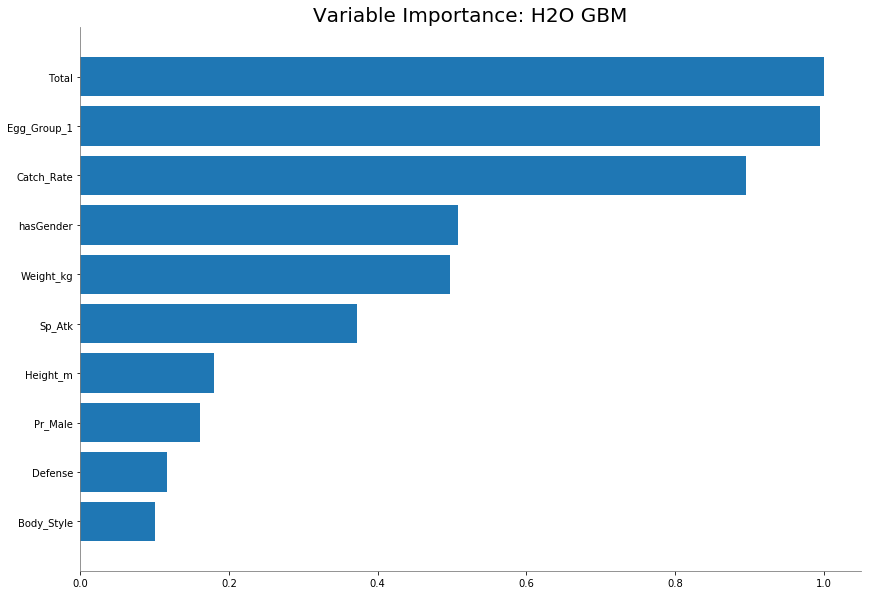

In [80]:
m.varimp_plot()

In [81]:
aml.leader.model_performance()


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 5.041121875219484e-05
RMSE: 0.007100085827100602
LogLoss: 0.0014166648012189297
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9632190396630882: 


,False,True,Error,Rate
False,495.0,0.0,0.0,(0.0/495.0)
True,0.0,33.0,0.0,(0.0/33.0)
Total,495.0,33.0,0.0,(0.0/528.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9632190,1.0,32.0
max f2,0.9632190,1.0,32.0
max f0point5,0.9632190,1.0,32.0
max accuracy,0.9632190,1.0,32.0
max precision,0.9978697,1.0,0.0
max recall,0.9632190,1.0,32.0
max specificity,0.9978697,1.0,0.0
max absolute_mcc,0.9632190,1.0,32.0
max min_per_class_accuracy,0.9632190,1.0,32.0
max mean_per_class_accuracy,0.9632190,1.0,32.0


Gains/Lift Table: Avg response rate:  6.25 %, avg score:  6.25 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0113636,0.9966659,16.0,16.0,1.0,0.9973940,1.0,0.9973940,0.1818182,0.1818182,1500.0,1500.0
,2,0.0208333,0.9943748,16.0,16.0,1.0,0.9956542,1.0,0.9966032,0.1515152,0.3333333,1500.0,1500.0
,3,0.0303030,0.9930070,16.0,16.0,1.0,0.9937962,1.0,0.9957260,0.1515152,0.4848485,1500.0,1500.0
,4,0.0416667,0.9881820,16.0,16.0,1.0,0.9905856,1.0,0.9943241,0.1818182,0.6666667,1500.0,1500.0
,5,0.0511364,0.9802906,16.0,16.0,1.0,0.9854987,1.0,0.9926897,0.1515152,0.8181818,1500.0,1500.0
,6,0.1003788,0.0015665,3.6923077,9.9622642,0.2307692,0.2362565,0.6226415,0.6216093,0.1818182,1.0,269.2307692,896.2264151
,7,0.1515152,0.0002900,0.0,6.6,0.0,0.0007361,0.4125,0.4120646,0.0,1.0,-100.0,560.0
,8,0.2007576,0.0001808,0.0,4.9811321,0.0,0.0002202,0.3113208,0.3110462,0.0,1.0,-100.0,398.1132075
,9,0.3011364,0.0001323,0.0,3.3207547,0.0,0.0001522,0.2075472,0.2074148,0.0,1.0,-100.0,232.0754717
,10,0.3996212,0.0001204,0.0,2.5023697,0.0,0.0001261,0.1563981,0.1563295,0.0,1.0,-100.0,150.2369668


In [82]:
aml.leader.plot

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20181015_212135_model_53


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 5.041121875219484e-05
RMSE: 0.007100085827100602
LogLoss: 0.0014166648012189297
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9632190396630882: 


,False,True,Error,Rate
False,495.0,0.0,0.0,(0.0/495.0)
True,0.0,33.0,0.0,(0.0/33.0)
Total,495.0,33.0,0.0,(0.0/528.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9632190,1.0,32.0
max f2,0.9632190,1.0,32.0
max f0point5,0.9632190,1.0,32.0
max accuracy,0.9632190,1.0,32.0
max precision,0.9978697,1.0,0.0
max recall,0.9632190,1.0,32.0
max specificity,0.9978697,1.0,0.0
max absolute_mcc,0.9632190,1.0,32.0
max min_per_class_accuracy,0.9632190,1.0,32.0
max mean_per_class_accuracy,0.9632190,1.0,32.0


Gains/Lift Table: Avg response rate:  6.25 %, avg score:  6.25 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0113636,0.9966659,16.0,16.0,1.0,0.9973940,1.0,0.9973940,0.1818182,0.1818182,1500.0,1500.0
,2,0.0208333,0.9943748,16.0,16.0,1.0,0.9956542,1.0,0.9966032,0.1515152,0.3333333,1500.0,1500.0
,3,0.0303030,0.9930070,16.0,16.0,1.0,0.9937962,1.0,0.9957260,0.1515152,0.4848485,1500.0,1500.0
,4,0.0416667,0.9881820,16.0,16.0,1.0,0.9905856,1.0,0.9943241,0.1818182,0.6666667,1500.0,1500.0
,5,0.0511364,0.9802906,16.0,16.0,1.0,0.9854987,1.0,0.9926897,0.1515152,0.8181818,1500.0,1500.0
,6,0.1003788,0.0015665,3.6923077,9.9622642,0.2307692,0.2362565,0.6226415,0.6216093,0.1818182,1.0,269.2307692,896.2264151
,7,0.1515152,0.0002900,0.0,6.6,0.0,0.0007361,0.4125,0.4120646,0.0,1.0,-100.0,560.0
,8,0.2007576,0.0001808,0.0,4.9811321,0.0,0.0002202,0.3113208,0.3110462,0.0,1.0,-100.0,398.1132075
,9,0.3011364,0.0001323,0.0,3.3207547,0.0,0.0001522,0.2075472,0.2074148,0.0,1.0,-100.0,232.0754717
,10,0.3996212,0.0001204,0.0,2.5023697,0.0,0.0001261,0.1563981,0.1563295,0.0,1.0,-100.0,150.2369668




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.013627046112635556
RMSE: 0.11673493955382662
LogLoss: 0.04328356814974064
Mean Per-Class Error: 0.004347826086956497
AUC: 0.9978260869565218
Gini: 0.9956521739130435
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12623858990193526: 


,False,True,Error,Rate
False,114.0,1.0,0.0087,(1.0/115.0)
True,0.0,8.0,0.0,(0.0/8.0)
Total,114.0,9.0,0.0081,(1.0/123.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1262386,0.9411765,8.0
max f2,0.1262386,0.9756098,8.0
max f0point5,0.9639389,0.9375,5.0
max accuracy,0.1262386,0.9918699,8.0
max precision,0.9974791,1.0,0.0
max recall,0.1262386,1.0,8.0
max specificity,0.9974791,1.0,0.0
max absolute_mcc,0.1262386,0.9387009,8.0
max min_per_class_accuracy,0.1262386,0.9913043,8.0
max mean_per_class_accuracy,0.1262386,0.9956522,8.0


Gains/Lift Table: Avg response rate:  6.50 %, avg score:  6.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0162602,0.9947546,15.3750000,15.3750000,1.0,0.9969047,1.0,0.9969047,0.25,0.25,1437.5000000,1437.5000000
,2,0.0243902,0.9889057,15.3750000,15.3750000,1.0,0.9891677,1.0,0.9943257,0.125,0.375,1437.5000000,1437.5000000
,3,0.0325203,0.9871446,15.3750000,15.3750000,1.0,0.9885722,1.0,0.9928873,0.125,0.5,1437.5000000,1437.5000000
,4,0.0406504,0.9666353,15.3750000,15.3750000,1.0,0.9864092,1.0,0.9915917,0.125,0.625,1437.5000000,1437.5000000
,5,0.0569106,0.9523567,7.6875000,13.1785714,0.5,0.9582681,0.8571429,0.9820707,0.125,0.75,668.7500000,1217.8571429
,6,0.1056911,0.0038664,5.1250000,9.4615385,0.3333333,0.1874245,0.6153846,0.6153109,0.25,1.0,412.5000000,846.1538462
,7,0.1544715,0.0011057,0.0,6.4736842,0.0,0.0021265,0.4210526,0.4216737,0.0,1.0,-100.0,547.3684211
,8,0.2032520,0.0002421,0.0,4.92,0.0,0.0004938,0.32,0.3205906,0.0,1.0,-100.0,392.0
,9,0.3008130,0.0001320,0.0,3.3243243,0.0,0.0001733,0.2162162,0.2166714,0.0,1.0,-100.0,232.4324324
,10,0.3983740,0.0001190,0.0,2.5102041,0.0,0.0001255,0.1632653,0.1636398,0.0,1.0,-100.0,151.0204082




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.004435346806724833
RMSE: 0.06659839943065324
LogLoss: 0.015883101472134616
Mean Per-Class Error: 0.002020202020202033
AUC: 0.9998775635139271
Gini: 0.9997551270278542
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8984000881321323: 


,False,True,Error,Rate
False,495.0,0.0,0.0,(0.0/495.0)
True,1.0,32.0,0.0303,(1.0/33.0)
Total,496.0,32.0,0.0019,(1.0/528.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8984001,0.9846154,31.0
max f2,0.7186424,0.9880240,34.0
max f0point5,0.8984001,0.9937888,31.0
max accuracy,0.8984001,0.9981061,31.0
max precision,0.9996015,1.0,0.0
max recall,0.7186424,1.0,34.0
max specificity,0.9996015,1.0,0.0
max absolute_mcc,0.8984001,0.9837388,31.0
max min_per_class_accuracy,0.7186424,0.9959596,34.0
max mean_per_class_accuracy,0.7186424,0.9979798,34.0


Gains/Lift Table: Avg response rate:  6.25 %, avg score:  6.66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0113636,0.9974372,16.0,16.0,1.0,0.9986911,1.0,0.9986911,0.1818182,0.1818182,1500.0,1500.0
,2,0.0208333,0.9874622,16.0,16.0,1.0,0.9920829,1.0,0.9956874,0.1515152,0.3333333,1500.0,1500.0
,3,0.0303030,0.9716484,16.0,16.0,1.0,0.9805329,1.0,0.9909516,0.1515152,0.4848485,1500.0,1500.0
,4,0.0416667,0.9419888,16.0,16.0,1.0,0.9611758,1.0,0.9828309,0.1818182,0.6666667,1500.0,1500.0
,5,0.0511364,0.9003515,16.0,16.0,1.0,0.9061497,1.0,0.9686307,0.1515152,0.8181818,1500.0,1500.0
,6,0.1003788,0.0088755,3.6923077,9.9622642,0.2307692,0.3323907,0.6226415,0.6565129,0.1818182,1.0,269.2307692,896.2264151
,7,0.1515152,0.0023086,0.0,6.6,0.0,0.0043522,0.4125,0.4364087,0.0,1.0,-100.0,560.0
,8,0.2045455,0.0020855,0.0,4.8888889,0.0,0.0021814,0.3055556,0.3238312,0.0,1.0,-100.0,388.8888889
,9,0.3011364,0.0013274,0.0,3.3207547,0.0,0.0018736,0.2075472,0.2205618,0.0,1.0,-100.0,232.0754717
,10,0.3996212,0.0007244,0.0,2.5023697,0.0,0.0008317,0.1563981,0.1664103,0.0,1.0,-100.0,150.2369668



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9981132,0.0026683,1.0,1.0,0.990566,1.0,1.0
auc,0.9997114,0.0004081,1.0,1.0,0.998557,1.0,1.0
err,0.0018868,0.0026683,0.0,0.0,0.0094340,0.0,0.0
err_count,0.2,0.2828427,0.0,0.0,1.0,0.0,0.0
f0point5,0.9794872,0.0290095,1.0,1.0,0.8974359,1.0,1.0
f1,0.9866667,0.0188562,1.0,1.0,0.9333333,1.0,1.0
f2,0.9944444,0.0078567,1.0,1.0,0.9722222,1.0,1.0
lift_top_group,16.415476,1.9144108,15.142858,17.666666,15.142858,13.125,21.0
logloss,0.0158835,0.0106358,0.0015761,0.0031036,0.0427675,0.0114903,0.0204800
max_per_class_error,0.0020202,0.0028570,0.0,0.0,0.0101010,0.0,0.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-10-15 21:23:59,2 min 5.644 sec,0.0,0.2420615,0.2337917,0.5,1.0,0.9375,0.2466107,0.2406719,0.5,1.0,0.9349593
,2018-10-15 21:23:59,2 min 5.651 sec,5.0,0.1971347,0.1405340,0.9999694,16.0,0.0018939,0.2088069,0.1557027,0.9918478,7.6875000,0.0162602
,2018-10-15 21:23:59,2 min 5.659 sec,10.0,0.1605996,0.1015051,1.0,16.0,0.0,0.1784812,0.1178625,0.9929348,15.3750000,0.0162602
,2018-10-15 21:23:59,2 min 5.667 sec,15.0,0.1328976,0.0780790,1.0,16.0,0.0,0.1576261,0.0962951,0.9940217,15.3750000,0.0162602
,2018-10-15 21:23:59,2 min 5.674 sec,20.0,0.1091887,0.0606583,1.0,16.0,0.0,0.1428991,0.0818004,0.9923913,15.3750000,0.0162602
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-10-15 21:23:59,2 min 5.891 sec,135.0,0.0091357,0.0019880,1.0,16.0,0.0,0.1152574,0.0422666,0.9978261,15.3750000,0.0081301
,2018-10-15 21:23:59,2 min 5.900 sec,140.0,0.0085130,0.0017648,1.0,16.0,0.0,0.1156279,0.0422919,0.9978261,15.3750000,0.0081301
,2018-10-15 21:23:59,2 min 5.910 sec,145.0,0.0080213,0.0016132,1.0,16.0,0.0,0.1154632,0.0421379,0.9978261,15.3750000,0.0081301
,2018-10-15 21:23:59,2 min 5.919 sec,150.0,0.0072162,0.0014365,1.0,16.0,0.0,0.1166632,0.0432905,0.9978261,15.3750000,0.0081301



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Total,48.8985329,1.0,0.1936618
Egg_Group_1,48.6230888,0.9943670,0.1925709
Catch_Rate,43.7949829,0.8956298,0.1734493
hasGender,24.8252621,0.5076893,0.0983200
Weight_kg,24.3187714,0.4973313,0.0963141
Sp_Atk,18.1800365,0.3717910,0.0720017
Height_m,8.8033495,0.1800330,0.0348655
Pr_Male,7.8636870,0.1608164,0.0311440
Defense,5.6841083,0.1162429,0.0225118
Body_Style,4.9551687,0.1013357,0.0196249


<bound method H2OBinomialModel.plot of >

In [83]:
pred = aml.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,False,True
False,0.999899,0.000101423
False,0.999899,0.000101423
False,0.999941,5.92181e-05
False,0.999939,6.1262e-05
False,0.999905,9.49815e-05
False,0.999904,9.62494e-05
False,0.999725,0.000274607
False,0.999877,0.000123367
False,0.99994,6.00748e-05
False,0.999873,0.000126932


In [84]:
pref = aml.leader.model_performance(test)
pref


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.022326803735845484
RMSE: 0.14942156382478897
LogLoss: 0.08444826881201595
Mean Per-Class Error: 0.007692307692307665
AUC: 0.9907692307692308
Gini: 0.9815384615384617
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41137175869039677: 


,False,True,Error,Rate
False,64.0,1.0,0.0154,(1.0/65.0)
True,0.0,5.0,0.0,(0.0/5.0)
Total,64.0,6.0,0.0143,(1.0/70.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4113718,0.9090909,5.0
max f2,0.4113718,0.9615385,5.0
max f0point5,0.4113718,0.8620690,5.0
max accuracy,0.4113718,0.9857143,5.0
max precision,0.9990058,1.0,0.0
max recall,0.4113718,1.0,5.0
max specificity,0.9990058,1.0,0.0
max absolute_mcc,0.4113718,0.9058216,5.0
max min_per_class_accuracy,0.4113718,0.9846154,5.0
max mean_per_class_accuracy,0.4113718,0.9923077,5.0


Gains/Lift Table: Avg response rate:  7.14 %, avg score:  6.98 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0142857,0.9934207,14.0,14.0,1.0,0.9990058,1.0,0.9990058,0.2,0.2,1300.0,1300.0
,2,0.0285714,0.9891986,14.0,14.0,1.0,0.9909114,1.0,0.9949586,0.2,0.4,1300.0,1300.0
,3,0.0428571,0.9858112,0.0,9.3333333,0.0,0.9864039,0.6666667,0.9921070,0.0,0.4,-100.0,833.3333333
,4,0.0428571,0.9799687,0.0,9.3333333,0.0,0.0,0.6666667,0.9921070,0.0,0.4,-100.0,833.3333333
,5,0.0571429,0.7661217,14.0,10.5,1.0,0.9779366,0.75,0.9885644,0.2,0.6,1300.0,950.0
,6,0.1,0.0018950,9.3333333,10.0,0.6666667,0.3071701,0.7142857,0.6965383,0.4,1.0,833.3333333,900.0
,7,0.1571429,0.0003682,0.0,6.3636364,0.0,0.0009642,0.4545455,0.4436022,0.0,1.0,-100.0,536.3636364
,8,0.2,0.0002493,0.0,5.0,0.0,0.0003016,0.3571429,0.3486092,0.0,1.0,-100.0,400.0
,9,0.3,0.0001324,0.0,3.3333333,0.0,0.0001690,0.2380952,0.2324625,0.0,1.0,-100.0,233.3333333
,10,0.4,0.0001217,0.0,2.5,0.0,0.0001248,0.1785714,0.1743781,0.0,1.0,-100.0,150.0


For model GBM_grid_0_AutoML_20181015_212135_model_53 the AUC is 0.999878 on training data and 0.9907692307692308 on testing data. The model is a good fit.	

## 3 MultiClass Classification

In [85]:
run_time = 333
name3 = 'abalone classification'

In [86]:
data_path3 = '/Users/matt/Desktop/abalone.csv'

In [87]:
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=6,port=port_no)

Checking whether there is an H2O instance running at http://localhost:37306..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_144"; Java(TM) SE Runtime Environment (build 1.8.0_144-b01); Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmpgb_bqo6q
  JVM stdout: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmpgb_bqo6q/h2o_matt_started_from_python.out
  JVM stderr: /var/folders/qb/37dx26k10cn0288tblh64zg40000gn/T/tmpgb_bqo6q/h2o_matt_started_from_python.err
  Server is running at http://127.0.0.1:37306
Connecting to H2O server at http://127.0.0.1:37306... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_matt_9p4ln6
H2O cluster total nodes:,1
H2O cluster free memory:,5.750 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [88]:
print(data_path3)

/Users/matt/Desktop/abalone.csv


In [89]:
df3 = h2o.import_file(data_path3)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [90]:
df3.head()

Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19


In [91]:
df3.describe()

Rows:4177
Cols:9




,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
type,enum,real,real,real,real,real,real,real,int
mins,,0.075,0.055,0.0,0.002,0.001,0.0005,0.0015,1.0
mean,,0.5239920995930094,0.40788125448886764,0.13951639932966242,0.8287421594445776,0.35936748862820206,0.18059360785252573,0.23883085946851806,9.933684462532918
maxs,,0.815,0.65,1.13,2.8255,1.488,0.76,1.005,29.0
sigma,,0.12009291256479956,0.09923986613365944,0.04182705660725727,0.4903890182309976,0.2219629490332201,0.10961425025968448,0.1392026695223861,3.2241690320681275
zeros,,0,0,2,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15.0
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7.0
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9.0


In [92]:
y = 'Sex'
X = df3.columns
X.remove(y)

In [93]:
print(y)

Sex


In [94]:
print(X)

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


In [95]:
train, test = df3.split_frame([0.9])

## 3.1 GLM

In [97]:
glm_model3 = H2OGeneralizedLinearEstimator(family= "multinomial",nfolds = 5)
glm_model3.train(x=X, y=y, training_frame= train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [98]:
glm_model3.plot

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1539653458732_1


ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.309516262281894
RMSE: 0.5563418573879679

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.3115925232395728
RMSE: 0.5582047323693815
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.5641593,0.0131661,0.5887851,0.5838838,0.5549738,0.5423729,0.5507812
err,0.4358406,0.0131661,0.4112150,0.4161162,0.4450262,0.4576271,0.4492188
err_count,326.4,10.025967,308.0,315.0,340.0,324.0,345.0
logloss,0.8601338,0.0135487,0.8533300,0.8356780,0.8472558,0.8771334,0.8872719
max_per_class_error,0.6397707,0.0159395,0.6666667,0.6443515,0.6066946,0.6592920,0.6218488
mean_per_class_accuracy,0.5644320,0.0105201,0.5826761,0.5766275,0.5660064,0.5410015,0.5558484
mean_per_class_error,0.4355680,0.0105201,0.4173240,0.4233725,0.4339936,0.4589985,0.4441516
mse,0.3116404,0.0047623,0.3077312,0.3006228,0.3134065,0.3177694,0.3186720
null_deviance,1643.4924,32.63097,1640.9673,1666.8479,1672.3676,1555.2881,1681.9913
r2,0.5368651,0.0055822,0.5375294,0.5390134,0.5495787,0.5256101,0.5325937


Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-10-15 21:31:57,0.000 sec,0,4106.6891901,1.0962865
,2018-10-15 21:31:57,0.104 sec,1,3270.1218366,0.8751396
,2018-10-15 21:31:57,0.214 sec,2,3206.7421621,0.8589842
,2018-10-15 21:31:57,0.309 sec,3,3199.9491016,0.8574083
,2018-10-15 21:31:57,0.413 sec,4,3199.8052714,0.8573864


<bound method H2OMultinomialModel.plot of >

In [99]:
pred = glm_model3.predict(test)
pred.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,F,I,M
M,0.421853,0.0803587,0.497788
M,0.377292,0.220177,0.402531
M,0.446195,0.000386688,0.553419
F,0.595729,0.0014399,0.402831
M,0.426658,0.112852,0.46049
I,0.0854066,0.760416,0.154177
I,0.195995,0.577871,0.226133
I,0.137022,0.649954,0.213024
M,0.364545,0.261411,0.374045
F,0.535491,0.0196515,0.444858


In [100]:
pref = glm_model3.model_performance(test)
pref


ModelMetricsMultinomialGLM: glm
** Reported on test data. **

MSE: 0.31352594908343173
RMSE: 0.5599338792066718


For glm_model3 the mse is 0.309516262281894 on training data and 0.31352594908343173 on testing data. The model is a good fit.

## 3.2 GBM

In [101]:
gbm_model3 = H2OGradientBoostingEstimator(distribution= "multinomial",nfolds = 5)
gbm_model3.train(x=X, y=y, training_frame= train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [102]:
gbm_model3.plot

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1539653458732_2


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.23614872806015297
RMSE: 0.4859513638834168
LogLoss: 0.6688575285845426
Mean Per-Class Error: 0.24886821721514865
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
714.0,106.0,347.0,0.3881748,"453 / 1,167"
47.0,1048.0,117.0,0.1353135,"164 / 1,212"
139.0,166.0,1062.0,0.2231163,"305 / 1,367"
900.0,1320.0,1526.0,0.2461292,"922 / 3,746"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.7538708
2,0.9482114
3,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3132555820182874
RMSE: 0.5596923994644625
LogLoss: 0.862548455755394
Mean Per-Class Error: 0.45337843665836336
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
412.0,156.0,599.0,0.6469580,"755 / 1,167"
89.0,939.0,184.0,0.2252475,"273 / 1,212"
434.0,233.0,700.0,0.4879298,"667 / 1,367"
935.0,1328.0,1483.0,0.4524826,"1,695 / 3,746"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5475174
2,0.8918847
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.5473762,0.0066462,0.5325615,0.5583892,0.5519481,0.5406758,0.5533063
err,0.4526238,0.0066462,0.4674385,0.4416107,0.4480520,0.4593241,0.4466937
err_count,339.0,11.135529,323.0,329.0,345.0,367.0,331.0
logloss,0.8623691,0.0078519,0.8568824,0.8729094,0.8752232,0.8620682,0.8447623
max_per_class_error,0.6466937,0.0135459,0.6363636,0.6177778,0.6638298,0.6444445,0.6710526
mean_per_class_accuracy,0.5468136,0.0086540,0.5274717,0.5654629,0.5430758,0.5477610,0.5502967
mean_per_class_error,0.4531864,0.0086540,0.4725284,0.4345371,0.4569242,0.4522390,0.4497032
mse,0.3132050,0.0024354,0.3122678,0.3163342,0.3165341,0.3137847,0.3071041
r2,0.5339789,0.0091190,0.5246262,0.5431416,0.51319,0.5464559,0.5424811
rmse,0.5596387,0.0021806,0.5588093,0.562436,0.5626136,0.5601649,0.5541697


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2018-10-15 21:32:14,4.983 sec,0.0,0.6666667,1.0986123,0.6748532
,2018-10-15 21:32:14,5.039 sec,1.0,0.6493546,1.0488117,0.3996263
,2018-10-15 21:32:14,5.069 sec,2.0,0.6343377,1.0085204,0.3940203
,2018-10-15 21:32:14,5.107 sec,3.0,0.6209536,0.9744216,0.3913508
,2018-10-15 21:32:14,5.132 sec,4.0,0.6093727,0.9460551,0.3865456
---,---,---,---,---,---,---
,2018-10-15 21:32:15,5.718 sec,46.0,0.4898879,0.6787827,0.2504004
,2018-10-15 21:32:15,5.727 sec,47.0,0.4887368,0.6764341,0.2493326
,2018-10-15 21:32:15,5.738 sec,48.0,0.4877799,0.6734110,0.2495996
,2018-10-15 21:32:15,5.748 sec,49.0,0.4866138,0.6706693,0.2463962



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Viscera weight,2064.1726074,1.0,0.4115473
Whole weight,806.6620483,0.3907920,0.1608294
Rings,608.5076294,0.2947949,0.1213221
Shell weight,368.6423340,0.1785908,0.0734986
Length,361.1393738,0.1749560,0.0720027
Shucked weight,342.5776672,0.1659637,0.0683019
Height,251.4588776,0.1218207,0.0501350
Diameter,212.4783783,0.1029363,0.0423632


<bound method H2OMultinomialModel.plot of >

In [103]:
pred = gbm_model3.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,F,I,M
M,0.371225,0.142345,0.48643
M,0.324187,0.30939,0.366423
F,0.663245,0.0437376,0.293018
F,0.673597,0.0248244,0.301578
M,0.366032,0.206476,0.427492
I,0.0418359,0.86714,0.0910245
I,0.124855,0.767445,0.107701
I,0.105622,0.727361,0.167017
I,0.168056,0.512412,0.319532
F,0.677168,0.0401887,0.282643


In [104]:
pref = gbm_model3.model_performance(test)
pref


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.30384745651547
RMSE: 0.5512235993818388
LogLoss: 0.834603465204004
Mean Per-Class Error: 0.4359213250517598
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
51.0,16.0,73.0,0.6357143,89 / 140
8.0,104.0,18.0,0.2,26 / 130
48.0,28.0,85.0,0.4720497,76 / 161
107.0,148.0,176.0,0.4431555,191 / 431


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5568445
2,0.9025522
3,1.0


For GBM_model3 the mse is 0.23614872806015297 on training data and 0.30384745651547 on testing data. The model is a little bit overfitting.

## 3.3 Deep learning

In [105]:
dp_model3 = H2ODeepLearningEstimator(
    model_id="multdl",
    hidden=[50,50],           
    epochs=50,                 
    ignore_const_cols=False, 
    sparse=True,              
    variable_importances=True,
    nfolds = 5
)
dp_model3.train(x=X,y = y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [106]:
dp_model3.plot

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  multdl


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.3434612685148062
RMSE: 0.5860556872130891
LogLoss: 0.9344598312434127
Mean Per-Class Error: 0.49551928905804044
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
917.0,39.0,211.0,0.2142245,"250 / 1,167"
482.0,639.0,91.0,0.4727723,"573 / 1,212"
971.0,122.0,274.0,0.7995611,"1,093 / 1,367"
2370.0,800.0,576.0,0.5114789,"1,916 / 3,746"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.4885211
2,0.8579819
3,1.0



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.34232626395160903
RMSE: 0.5850865439843999
LogLoss: 1.0620671136351103
Mean Per-Class Error: 0.49559051517294733
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
733.0,126.0,308.0,0.3718937,"434 / 1,167"
345.0,766.0,101.0,0.3679868,"446 / 1,212"
817.0,204.0,346.0,0.7468910,"1,021 / 1,367"
1895.0,1096.0,755.0,0.5074746,"1,901 / 3,746"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.4925254
2,0.851575
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.4928896,0.0334690,0.5381526,0.5465587,0.4204244,0.4979757,0.4613368
err,0.5071104,0.0334690,0.4618474,0.4534413,0.5795756,0.5020243,0.5386631
err_count,380.2,27.26683,345.0,336.0,437.0,372.0,411.0
logloss,1.0609065,0.0986136,0.9248390,0.8807687,1.2260971,1.0748032,1.1980245
max_per_class_error,0.87092,0.0803004,0.8306451,0.6742082,0.9795222,0.9805447,0.8896797
mean_per_class_accuracy,0.5072957,0.0230463,0.5394249,0.5420667,0.4603877,0.5155999,0.4789993
mean_per_class_error,0.4927043,0.0230463,0.4605751,0.4579333,0.5396123,0.4844001,0.5210007
mse,0.3422061,0.0160421,0.3073812,0.3320547,0.3762621,0.3432941,0.3520384
r2,0.4912423,0.0239890,0.5486918,0.4999591,0.4470255,0.4707212,0.4898138
rmse,0.584661,0.0137410,0.5544198,0.5762419,0.613402,0.5859131,0.5933283


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
,2018-10-15 21:32:33,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2018-10-15 21:32:33,7.585 sec,80891 obs/sec,5.1825948,1,19414.0,0.5820207,0.9276845,0.4971113,0.4954618
,2018-10-15 21:32:35,9.271 sec,112412 obs/sec,57.1967432,11,214259.0,0.5860557,0.9344598,0.4901142,0.5114789


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Shucked weight,1.0,1.0,0.1611106
Whole weight,0.9140861,0.9140861,0.1472690
Viscera weight,0.7611294,0.7611294,0.1226260
Rings,0.7565413,0.7565413,0.1218868
Shell weight,0.7537981,0.7537981,0.1214449
Length,0.7290813,0.7290813,0.1174627
Diameter,0.6851111,0.6851111,0.1103787
Height,0.6071684,0.6071684,0.0978213


<bound method H2OMultinomialModel.plot of >

In [107]:
pred = dp_model3.predict(test)
pred.head()

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,F,I,M
F,0.519971,0.0803151,0.399714
F,0.59099,0.0578152,0.351195
M,0.472416,0.0454598,0.482124
F,0.663448,0.0194301,0.317122
F,0.610993,0.0526224,0.336385
I,0.309963,0.452141,0.237897
F,0.49082,0.200739,0.308441
I,0.309923,0.42647,0.263607
F,0.444897,0.162296,0.392807
F,0.605719,0.0516163,0.342665


In [108]:
pref = dp_model3.model_performance(test)
pref


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.3436010647651126
RMSE: 0.5861749438223307
LogLoss: 0.9221956579161925
Mean Per-Class Error: 0.4903169294473642
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
108.0,10.0,22.0,0.2285714,32 / 140
53.0,67.0,10.0,0.4846154,63 / 130
108.0,14.0,39.0,0.7577640,122 / 161
269.0,91.0,71.0,0.5034803,217 / 431


Top-3 Hit Ratios: 


k,hit_ratio
1,0.4965197
2,0.8422273
3,0.9999999


For deep learning model3 the mse is 0.3434612685148062 on training data and 0.3436010647651126 on testing data. The model is a good fit.

## 3.4 Auto ML

In [109]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name=name3)

In [110]:
aml.train(x=X,y=y,training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [111]:
aml_ld_df = aml.leaderboard.as_data_frame()

In [112]:
aml_ld_df

,model_id,mean_per_class_error,logloss,rmse,mse
0,StackedEnsemble_BestOfFamily_0_AutoML_20181015...,0.439096,0.848466,0.556677,0.309889
1,GLM_grid_0_AutoML_20181015_213242_model_0,0.441341,0.862569,0.558050,0.311420
2,GBM_grid_0_AutoML_20181015_213242_model_22,0.441818,0.909199,0.591513,0.349887
3,DeepLearning_grid_0_AutoML_20181015_213242_mod...,0.446192,0.880841,0.551255,0.303882
4,GBM_grid_0_AutoML_20181015_213242_model_21,0.446759,0.855553,0.559897,0.313485
5,GBM_grid_0_AutoML_20181015_213242_model_35,0.446797,0.862696,0.560840,0.314541
6,GBM_grid_0_AutoML_20181015_213242_model_14,0.448043,0.985391,0.624715,0.390269
7,GBM_grid_0_AutoML_20181015_213242_model_12,0.448420,0.858938,0.564020,0.318119
8,GBM_grid_0_AutoML_20181015_213242_model_4,0.448430,0.854086,0.558031,0.311398
9,StackedEnsemble_AllModels_0_AutoML_20181015_21...,0.448643,0.846669,0.556045,0.309186


In [118]:
m = h2o.get_model(aml.leaderboard[2,"model_id"])
m

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20181015_213242_model_22


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3355628277811455
RMSE: 0.5792778502421316
LogLoss: 0.8764685140691142
Mean Per-Class Error: 0.3713549762853448
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
430.0,104.0,417.0,0.5478444,521 / 951
30.0,777.0,168.0,0.2030769,198 / 975
241.0,161.0,705.0,0.3631436,"402 / 1,107"
701.0,1042.0,1290.0,0.3696011,"1,121 / 3,033"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.6303989
2,0.9218595
3,0.9999999



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.34790847558027604
RMSE: 0.5898376688380254
LogLoss: 0.9046046572431098
Mean Per-Class Error: 0.42848221476913456
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
82.0,22.0,112.0,0.6203704,134 / 216
11.0,176.0,50.0,0.2573840,61 / 237
66.0,40.0,154.0,0.4076923,106 / 260
159.0,238.0,316.0,0.4221599,301 / 713


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5778401
2,0.8934081
3,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3498871040759861
RMSE: 0.5915125561439809
LogLoss: 0.9091992934581864
Mean Per-Class Error: 0.441817981079862
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



F,I,M,Error,Rate
342.0,113.0,496.0,0.6403785,609 / 951
49.0,758.0,168.0,0.2225641,217 / 975
332.0,180.0,595.0,0.4625113,"512 / 1,107"
723.0,1051.0,1259.0,0.4411474,"1,338 / 3,033"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5588526
2,0.8882295
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.5588475,0.0092528,0.5453048,0.5683690,0.5782537,0.5445545,0.5577558
err,0.4411524,0.0092528,0.4546952,0.4316310,0.4217463,0.4554456,0.4422442
err_count,267.6,5.5425625,276.0,262.0,256.0,276.0,268.0
logloss,0.9092017,0.0083847,0.9263616,0.8963156,0.8976175,0.9192444,0.9064695
max_per_class_error,0.6529588,0.0241632,0.5896415,0.6632124,0.6556604,0.6631579,0.6931217
mean_per_class_accuracy,0.5610532,0.0109361,0.5579544,0.5648125,0.5882248,0.542308,0.5519665
mean_per_class_error,0.4389467,0.0109361,0.4420456,0.4351875,0.4117753,0.4576920,0.4480334
mse,0.3498882,0.0040182,0.3582157,0.3434380,0.3448337,0.3546322,0.3483211
r2,0.4804542,0.0094307,0.4649361,0.4845100,0.5039874,0.4727658,0.4760716
rmse,0.5914940,0.0033925,0.5985112,0.5860359,0.5872254,0.59551,0.5901874


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2018-10-15 21:33:59,43.170 sec,0.0,0.6666667,1.0986123,0.6795252,0.6666667,1.0986123,0.6577840
,2018-10-15 21:33:59,43.204 sec,5.0,0.6589148,1.0758151,0.3999341,0.6594934,1.0775274,0.4361851
,2018-10-15 21:33:59,43.240 sec,10.0,0.6516291,1.0551450,0.3916914,0.6526977,1.0582666,0.4291725
,2018-10-15 21:33:59,43.276 sec,15.0,0.6447465,1.0362364,0.3972964,0.6463798,1.0409502,0.4319776
,2018-10-15 21:33:59,43.302 sec,20.0,0.6382737,1.0189422,0.3943290,0.6404499,1.0251628,0.4235624
,2018-10-15 21:33:59,43.326 sec,25.0,0.6322953,1.0033566,0.3982855,0.6348419,1.0105629,0.4207574
,2018-10-15 21:33:59,43.350 sec,30.0,0.6265554,0.9887010,0.4002638,0.6296340,0.9973630,0.4165498
,2018-10-15 21:33:59,43.372 sec,35.0,0.6211944,0.9752536,0.3943290,0.6249506,0.9857307,0.4207574
,2018-10-15 21:33:59,43.397 sec,40.0,0.6161599,0.9628211,0.3887240,0.6206128,0.9751460,0.4179523
,2018-10-15 21:33:59,43.432 sec,45.0,0.6113498,0.9511279,0.3854270,0.6164051,0.9650137,0.4193548


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Viscera weight,8141.4252930,1.0,0.3942294
Whole weight,4870.9775391,0.5982954,0.2358657
Rings,2587.4948730,0.3178184,0.1252934
Shell weight,2470.8752441,0.3034942,0.1196463
Shucked weight,909.9114990,0.1117632,0.0440603
Length,747.4481201,0.0918080,0.0361934
Height,519.3305054,0.0637886,0.0251474
Diameter,404.0267639,0.0496260,0.0195640


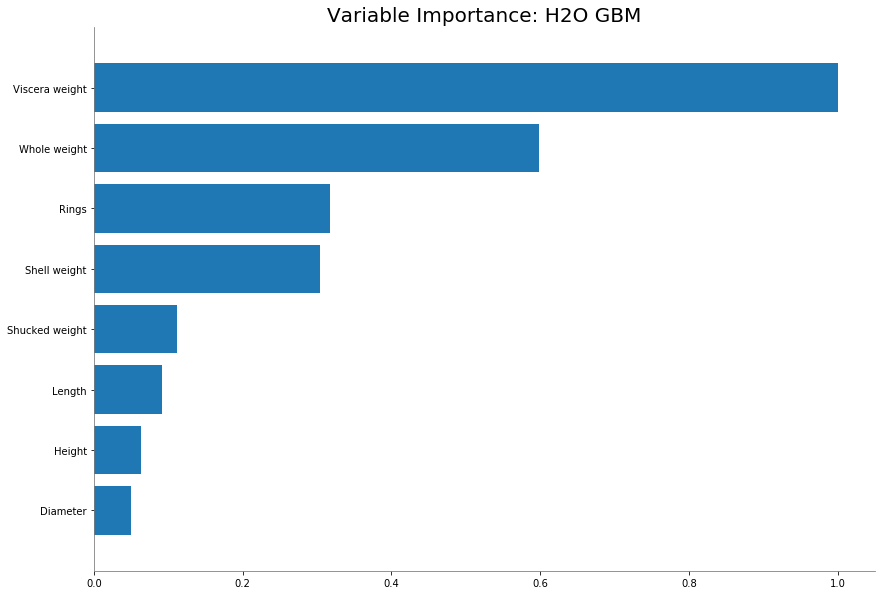

In [119]:
m.varimp_plot()

In [120]:
aml.leader.model_performance()


ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.2696322129165289
RMSE: 0.5192612183829338


In [121]:
pred = aml.predict(test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,F,I,M
M,0.439717,0.0871061,0.473177
M,0.337998,0.266052,0.395951
M,0.453455,0.0570543,0.489491
F,0.51255,0.0507531,0.436697
M,0.434549,0.110384,0.455067
I,0.0383781,0.879028,0.0825935
I,0.104493,0.710135,0.185373
I,0.110964,0.681731,0.207305
M,0.351413,0.216321,0.432266
F,0.494625,0.061071,0.444304


In [122]:
pref = aml.leader.model_performance(test)
pref


ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.3082800466453451
RMSE: 0.5552297242091286


For this model the mse is 0.2696322129165289 on the training data and 0.3082800466453451 on the testing data. The model is a litte bit overfitting.